# 미니 프로젝트

# DACON - 심리 성향 예측 AI 경진대회

# EDA

In [2]:
# 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler

#데이터분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

#성과 평가 지표
from sklearn.metrics import accuracy_score, mean_squared_error

In [3]:
# 파일 불러오기
train=pd.read_csv('train.csv', index_col=0)
test=pd.read_csv('test_x.csv', index_col=0)
submission=pd.read_csv('sample_submission.csv', index_col=0)  
print(train.shape)
print(test.shape)
print(submission.shape)

(45532, 77)
(11383, 76)
(11383, 1)


## 데이터 확인

In [7]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
train.head(20)

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,2.0,1258,5.0,1451,1.0,1029,3.0,1633,1.0,2254,5.0,1984,1.0,1158,3.0,1194,3.0,483,1.0,983,1.0,817,5.0,1052,1.0,1354,1.0,747,2.0,1826,40s,2,1,6,Female,1,3,White,Other,5,5,5,4,5,3,3,7,5,3,2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6,1.0,1382,1.0,1473,5.0,1479,4.0,2403,1.0,616,2.0,549,5.0,390,4.0,1601,5.0,1312,1.0,1699,4.0,1229,4.0,1175,1.0,1078,4.0,341,5.0,635,2.0,1448,4.0,838,4.0,765,3.0,1954,1.0,1482,20s,2,1,3,Male,1,1,White,Atheist,2,4,3,5,1,1,3,2,1,5,2,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1
7,1.0,384,1.0,908,5.0,870,1.0,1059,1.0,1266,1.0,483,1.0,592,1.0,2020,5.0,6022,5.0,2090,4.0,1767,5.0,982,5.0,1576,1.0,782,3.0,911,5.0,417,1.0,392,5.0,1510,1.0,842,1.0,1138,30s,2,1,1,Male,1,1,White,Christian_Other,3,6,0,0,0,0,0,1,2,6,2,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1
8,5.0,795,2.0,3469,4.0,1693,3.0,1991,4.0,5922,2.0,1322,5.0,1014,5.0,3014,3.0,3771,3.0,13295,5.0,3605,3.0,9265,4.0,2531,1.0,812,4.0,2595,5.0,1227,5.0,1837,4.0,1218,4.0,9923,5.0,1631,20s,4,2,0,Female,2,1,Other,Christian_Other,1,1,2,1,2,2,2,2,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

## 데이터 균형도

In [8]:
train.groupby('voted').voted.sum()

voted
1    20634
2    49796
Name: voted, dtype: int64

* 데이터가 전체적으로 투표 안 한 사람들이 더 많다. 불균형

## 마키아벨리즘 score 알아내기

In [9]:
col = train.columns
QACol = col[col.str.endswith('A')]
col[col.str.endswith('A')]

Index(['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA',
       'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA'],
      dtype='object')

In [10]:
Q_A = train[QACol]
Q_A

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
index,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,5.0,1.0,2.0,5.0,2.0,4.0,5.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0
1,5.0,5.0,3.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,5.0,4.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0
2,4.0,1.0,1.0,4.0,5.0,1.0,4.0,1.0,3.0,2.0,5.0,5.0,2.0,4.0,2.0,1.0,5.0,4.0,1.0,1.0
3,3.0,3.0,4.0,3.0,1.0,2.0,4.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0
4,1.0,1.0,5.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,4.0,5.0,5.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0,4.0,1.0,2.0,4.0,2.0,1.0,5.0,4.0
45528,2.0,3.0,4.0,1.0,3.0,2.0,2.0,1.0,2.0,5.0,2.0,5.0,3.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0
45529,4.0,1.0,1.0,4.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0,1.0,5.0,5.0,3.0,1.0


<AxesSubplot:>

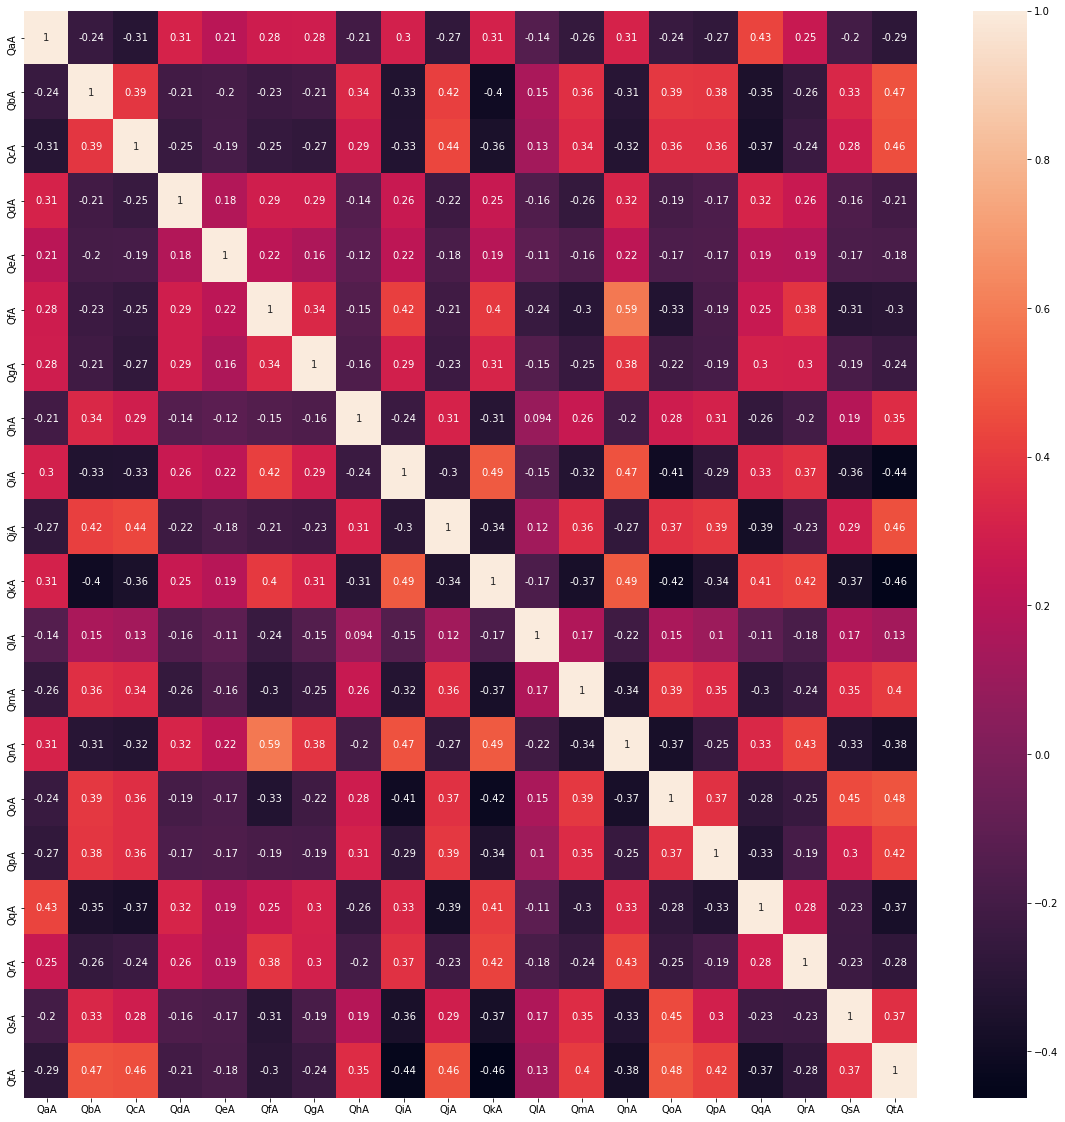

In [11]:
QA_corr = Q_A.corr()
plt.rcParams["figure.figsize"] = (20,20)
sns.heatmap(QA_corr,annot=True)

In [12]:
tmp_col = ['QaA', 'QdA', 'QeA','QfA','QgA','QbA','QcA','QhA','QjA','QlA', 'voted']
train[tmp_col].corr()

,QaA,QdA,QeA,QfA,QgA,QbA,QcA,QhA,QjA,QlA,voted
QaA,1.000000,0.313172,0.211496,0.278128,0.284088,-0.241980,-0.309438,-0.206606,-0.271789,-0.139342,-0.038820
QdA,0.313172,1.000000,0.177335,0.289385,0.286276,-0.207616,-0.245332,-0.141015,-0.224679,-0.157913,0.000442
QeA,0.211496,0.177335,1.000000,0.216240,0.163681,-0.197120,-0.194034,-0.115286,-0.177303,-0.113245,0.009300
QfA,0.278128,0.289385,0.216240,1.000000,0.335580,-0.230640,-0.251508,-0.145183,-0.211676,-0.241877,-0.030309
QgA,0.284088,0.286276,0.163681,0.335580,1.000000,-0.213849,-0.273718,-0.162458,-0.228686,-0.147158,-0.023765
QbA,-0.241980,-0.207616,-0.197120,-0.230640,-0.213849,1.000000,0.385936,0.335355,0.416002,0.150751,0.099209
QcA,-0.309438,-0.245332,-0.194034,-0.251508,-0.273718,0.385936,1.000000,0.290533,0.435447,0.129842,0.045148
QhA,-0.206606,-0.141015,-0.115286,-0.145183,-0.162458,0.335355,0.290533,1.000000,0.313781,0.093610,0.051604
QjA,-0.271789,-0.224679,-0.177303,-0.211676,-0.228686,0.416002,0.435447,0.313781,1.000000,0.123711,0.083216
QlA,-0.139342,-0.157913,-0.113245,-0.241877,-0.147158,0.150751,0.129842,0.093610,0.123711,1.000000,0.023158


- a,d,e,f,g,i,k,n,q,r : -
- b,c,h,j,l,m,o,p,s,t : +

## Q_A 분포

In [13]:
train['QaA'].value_counts().keys()

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64')

In [55]:
QA_col = [col for col in train[cat_cols].columns if col.startswith('Q')]
wr_col = [col for col in train[cat_cols].columns if col.startswith('wr')]
wf_col = [col for col in train[cat_cols].columns if col.startswith('wf')]
tp_col = [col for col in train[cat_cols].columns if col.startswith('tp')]
qa = []

for c in train[QA_col].columns:
    print("---- %s ---" % c)
    print(train[c].value_counts())
    qa_label = {1:'Disagree', 2:'Slightly disagree', 3:'Neutral', 4:'Slightly agree', 5:'Agree'}
    temp = train[c].value_counts().reset_index().replace({'index':qa_label}).set_index('index').transpose()
    qa.append(temp)
    
qa_df = pd.concat(qa)

---- QaA ---
1.0    18161
2.0    12912
3.0     7147
4.0     5024
5.0     2288
Name: QaA, dtype: int64
---- QbA ---
1.0    13427
4.0    10112
5.0    10111
2.0     7830
3.0     4052
Name: QbA, dtype: int64
---- QcA ---
5.0    17971
4.0    11995
2.0     6161
1.0     5809
3.0     3596
Name: QcA, dtype: int64
---- QdA ---
1.0    25238
2.0    11806
3.0     4541
4.0     2569
5.0     1378
Name: QdA, dtype: int64
---- QeA ---
1.0    17781
2.0    10459
3.0     7321
5.0     4995
4.0     4976
Name: QeA, dtype: int64
---- QfA ---
1.0    19577
2.0    12794
4.0     4924
5.0     4574
3.0     3663
Name: QfA, dtype: int64
---- QgA ---
1.0    16329
2.0     9947
4.0     7770
5.0     7414
3.0     4072
Name: QgA, dtype: int64
---- QhA ---
1.0    20621
2.0     7169
3.0     6053
4.0     6022
5.0     5667
Name: QhA, dtype: int64
---- QiA ---
5.0    12276
2.0     9984
4.0     9078
1.0     8233
3.0     5961
Name: QiA, dtype: int64
---- QjA ---
5.0    14535
4.0    14091
2.0     6696
1.0     5130
3.0     5080
Name

<BarContainer object of 5 artists>

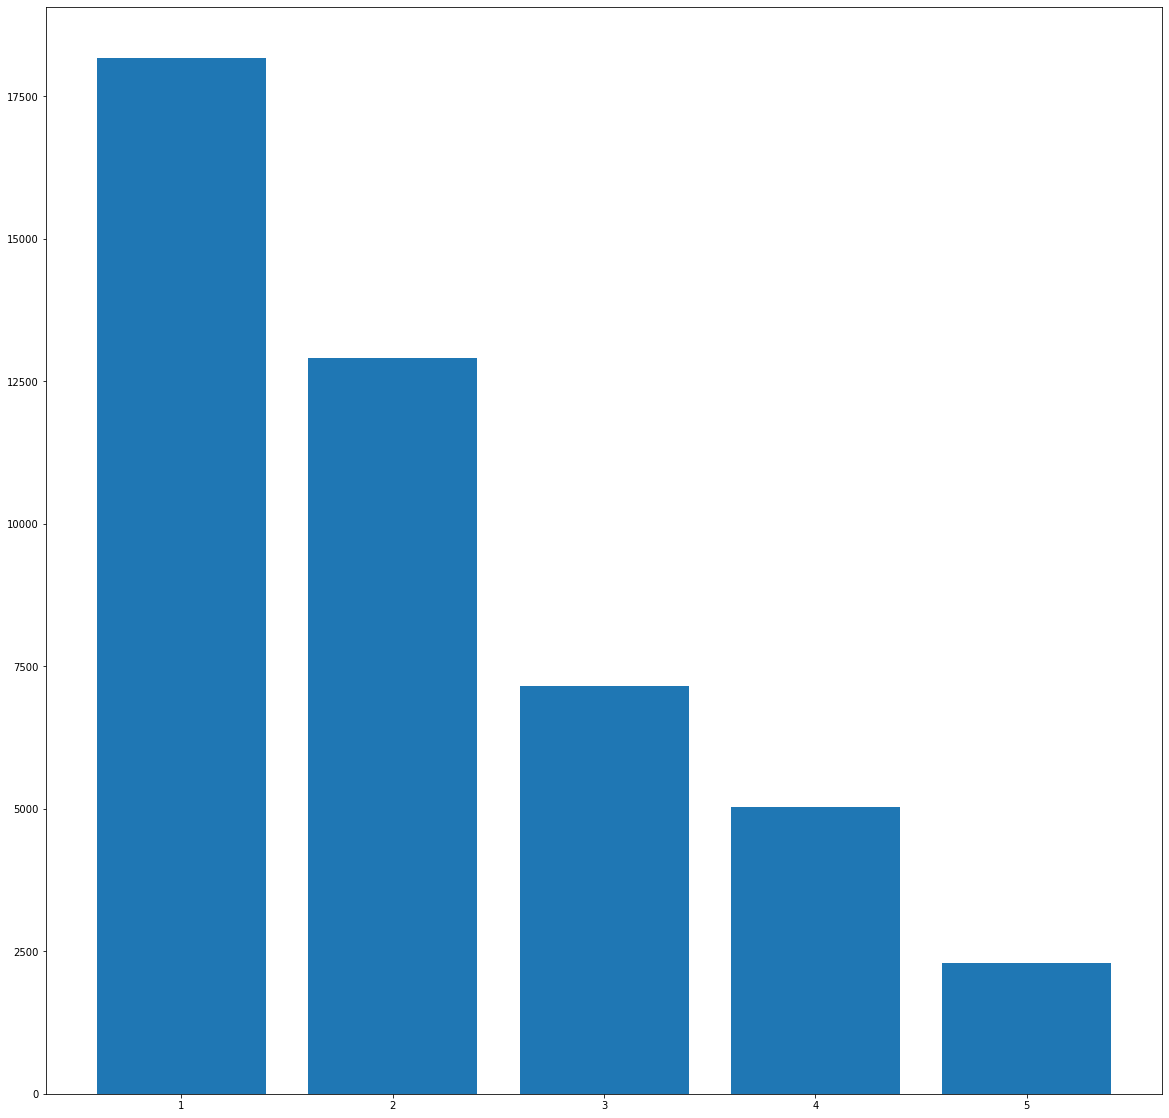

In [14]:
plt.bar(train['QaA'].value_counts().keys(),train['QaA'].value_counts().values)

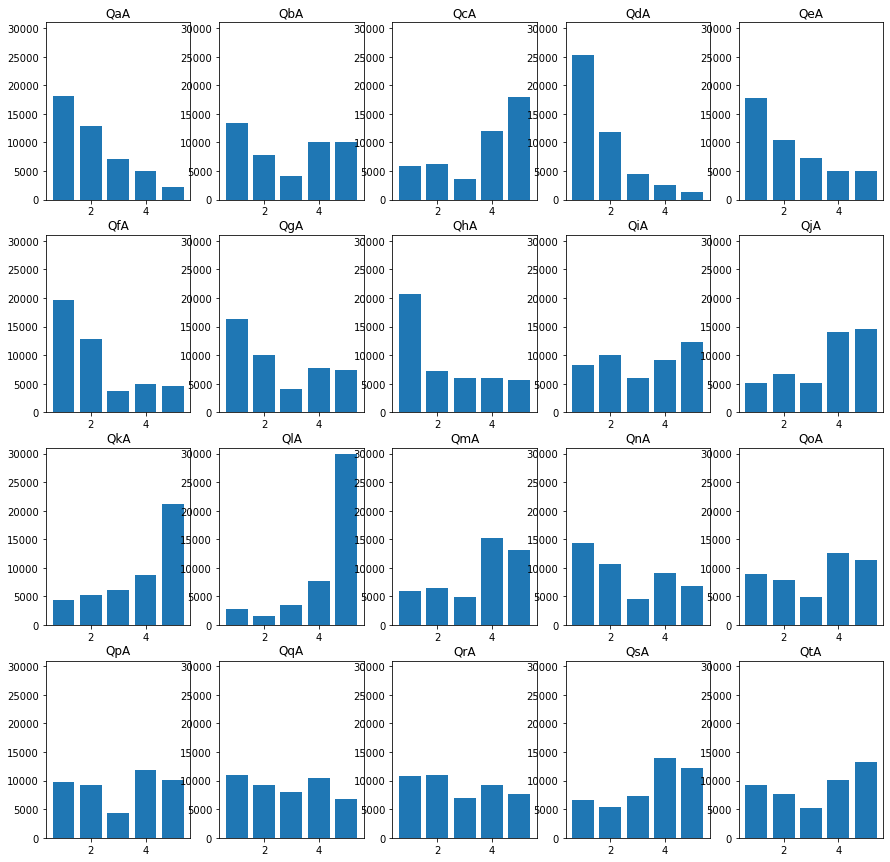

In [15]:
plt.rcParams["figure.figsize"] = (15,15)
fig = plt.figure()
for idx,c in enumerate(Q_A):
    tmp_vc = train[c].value_counts()
    axval = 'ax' + str(idx)
    axval = fig.add_subplot(4,5,idx+1)
    axval.bar(tmp_vc.keys(),tmp_vc.values)
    axval.set_ylim(0,31000)
    axval.set_title(QACol[idx])
plt.show()

## 결측치

In [16]:
train.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,1.749078,1.490672e+03,2.317952,1.899292e+03,2.168145,1.850650e+03,2.560595,1.284608e+03,2.317952,4.584272e+03,3.157691,4.068434e+03,3.575529,2.576363e+03,3.813933,2.038986e+03,4.325727,3.741018e+03,3.509620,2.050287e+03,2.632896,959.880502,3.217232,1.435762e+03,3.071752,1.633479e+03,2.840464,1.154352e+03,2.823487,2.470808e+03,3.432948,1.164117e+03,3.225687,2.240057e+03,2.544474,1.271326,4.716689e+04,1.170715,1.387112,3.017241,2.621189,1.768712,3.041246,1.335918,2.472217,2.031099,3.507226,2.277497,4.317996,2.180401,1.546824,0.079592,0.163665,0.118356,0.709721,0.934793,0.208974,0.868708,0.895722,0.328538,0.938900,0.972195,0.202824,0.946104,0.395195,0.947729,0.927040
std,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,1.670765e+04,1.348653,7.608236e+04,1.510600,9.756584e+03,1.460813,5.020265e+05,1.481740,1.141738e+05,1.361220,5.411432e+04,1.372551,3.069164e+04,1.146992,3.663672e+05,1.375134,7.530787e+04,1.473022,5869.964127,1.476414,1.084997e+04,1.489744,2.600221e+04,1.404342,2.250689e+04,1.424383,1.482890e+05,1.374938,7.433515e+03,1.521603,6.730924e+04,0.941328,0.448436,1.006402e+07,0.468883,0.639987,2.007713,1.897081,1.685069,2.037278,1.452544,2.000658,1.785824,1.971456,1.848783,1.722793,0.762647,0.497808,0.270664,0.369975,0.323033,0.453896,0.246893,0.406580,0.337723,0.305625,0.469687,0.239516,0.164414,0.402107,0.225815,0.488898,0.222575,0.260073
min,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.040000e+02,1.000000,8.750000e+02,2.000000,651.000000,1.000000,6.790000e+02,1.000000,8.340000e+02,1.000000,5.040000e+02,1.000000,5.490000e+02,1.000000,1.077000e+03,2.000000,1.259000e+03,2.000000,9.020000e+02,3.000000,8.590000e+02,4.000000,8.060000e+02,2.000000,6.500000e+02,1.000000,428.000000,2.000000,6.380000e+02,2.000000,7.060000e+02,2.000000,4.610000e+02,2.000000,7.940000e+02,2.000000,5.270000e+02,2.000000,7.330000e+02,2.000000,1.000000,2.

In [47]:
np.sum(np.sum(train.isnull())) # 결측값 없음

0

In [35]:
num_cols = [col for col in train.columns if col.endswith('E')]
num_cols.append('familysize')
QE_col = [col for col in train.columns if col.endswith('E')]
cat_cols = sorted(list(set(train.columns) - set(num_cols)))
train[cat_cols] = train[cat_cols].astype('category')

# 명목형 변수 타입 변경
train['education']=train['education'].astype('str')
test['education']=test['education'].astype('str')

train['engnat']=train['engnat'].astype('str')
test['engnat']=test['engnat'].astype('str')

train['urban']=train['urban'].astype('str')
test['urban']=test['urban'].astype('str')

train['married']=train['married'].astype('str')
test['married']=test['married'].astype('str')

## Q_E

Text(0.5, 1.0, '각 질문을 답할 때까지의 총합 시간')

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45813 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54624 missing from c

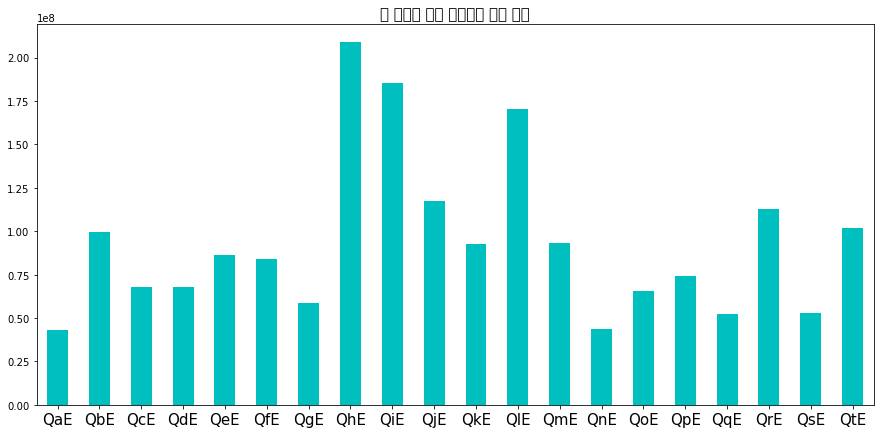

In [49]:
train[QE_col].sum(axis=0).plot.bar(color='c',figsize=(15,7))
plt.xticks(fontsize =15, rotation=0)
plt.title("각 질문을 답할 때까지의 총합 시간", fontsize=15)

Text(0.5, 1.0, '각 질문을 답할 때까지의 평균 시간')

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0, flags=flags)


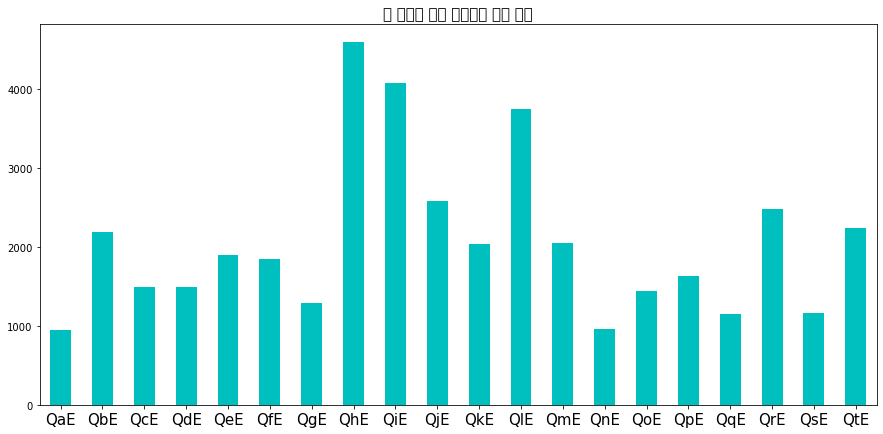

In [50]:
train[QE_col].mean(axis=0).plot.bar(color='c',figsize=(15,7))
plt.xticks(fontsize =15, rotation=0)
plt.title("각 질문을 답할 때까지의 평균 시간", fontsize=15)

Text(0.5, 1.0, '각 질문을 답할 때까지의 시간 중위수')

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from curre

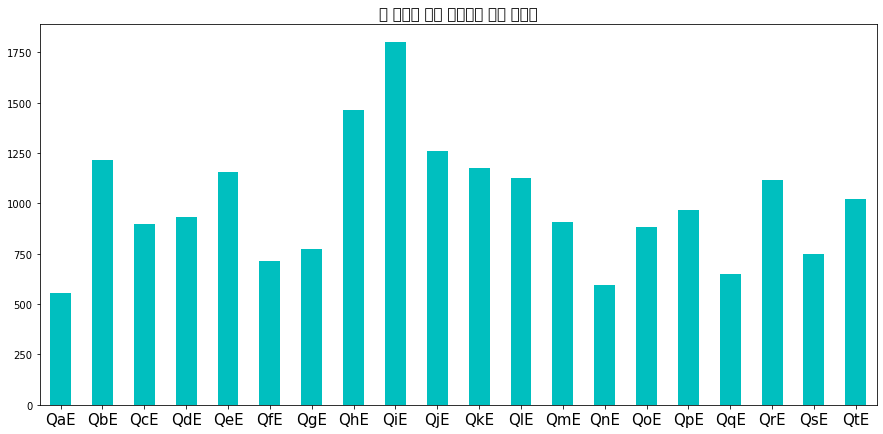

In [51]:
train[QE_col].median(axis=0).plot.bar(color='c',figsize=(15,7))
plt.xticks(fontsize =15, rotation=0)
plt.title("각 질문을 답할 때까지의 시간 중위수", fontsize=15)

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45813 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54624 missing from c

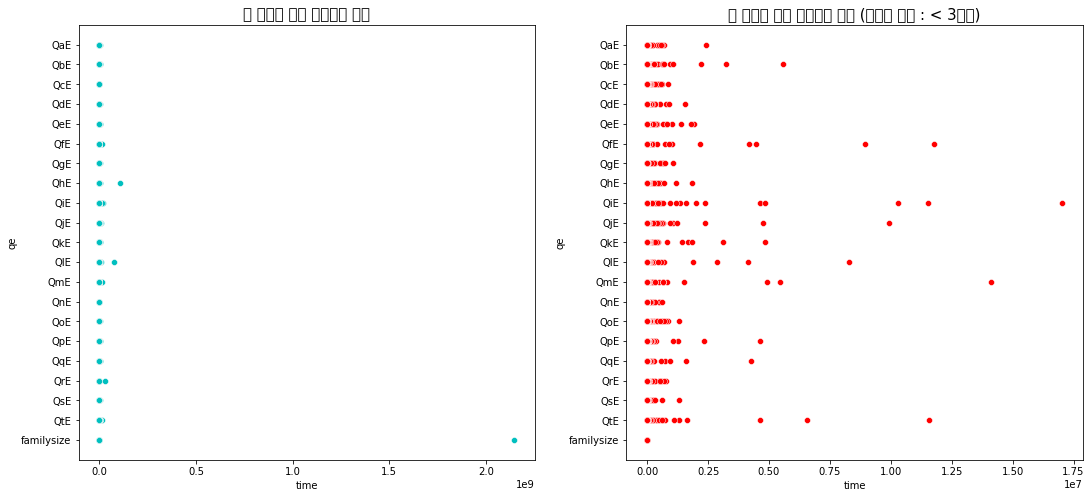

In [52]:
qe_df = train[num_cols].stack().reset_index()
qe_df.columns = ['index','qe','time']

figure, (ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,8)
sns.scatterplot(x='time', y='qe', data = qe_df, ax=ax1, color='c')
ax1.set_title("각 질문을 답할 때까지의 시간", fontsize=15)

qe = qe_df[qe_df['time'] < 30000000]
sns.scatterplot(x='time', y='qe', data = qe, ax=ax2, color='r')
ax2.set_title("각 질문을 답할 때까지의 시간 (이상치 제거 : < 3천만)", fontsize=15)
plt.show()

In [17]:
for c in train.columns:
    if c in QACol or c.startswith('Q'):
        continue
    display(train[c].value_counts())

10s     14215
20s     14112
30s      7836
40s      5051
50s      2889
60s      1194
+70s      235
Name: age_group, dtype: int64

2    16835
3    15227
4     7854
1     5088
0      528
Name: education, dtype: int64

1    33024
2    12431
0       77
Name: engnat, dtype: int64

2             17918
3             11256
1              6535
4              4907
5              1962
0              1217
6               838
7               387
8               221
9               126
10               59
11               39
12               21
13               11
14                9
15                8
17                3
44                3
21                2
20                2
16                2
18                1
100               1
999               1
2147483647        1
34                1
30                1
Name: familysize, dtype: int64

Male      24217
Female    21315
Name: gender, dtype: int64

1    39058
2     4692
3     1621
0      161
Name: hand, dtype: int64

1    31550
2    10059
3     3830
0       93
Name: married, dtype: int64

White                    31248
Asian                     6834
Other                     4330
Black                     2168
Native American            548
Arab                       351
Indigenous Australian       53
Name: race, dtype: int64

Atheist                 10192
Agnostic                 9624
Christian_Catholic       6431
Christian_Other          5137
Christian_Protestant     4875
Other                    4770
Hindu                    1429
Muslim                   1192
Buddhist                  850
Jewish                    487
Christian_Mormon          428
Sikh                      117
Name: religion, dtype: int64

1    9014
5    7942
2    7877
6    6041
4    5900
0    4783
3    3692
7     283
Name: tp01, dtype: int64

2    12498
1     9208
0     5438
5     5340
6     4614
4     4198
3     3921
7      315
Name: tp02, dtype: int64

1    13488
0    11567
2     8777
4     4053
3     3483
5     2515
6     1288
7      361
Name: tp03, dtype: int64

2    10189
5     7277
6     7078
1     6752
0     5437
4     4754
3     3710
7      335
Name: tp04, dtype: int64

0    15772
1    13681
2     8775
3     2750
4     2513
5     1243
6      507
7      291
Name: tp05, dtype: int64

2    9445
0    8912
1    8640
6    4736
4    4714
5    4664
3    4126
7     295
Name: tp06, dtype: int64

1    11689
2     9914
0     9811
3     4339
4     3968
5     3129
6     2345
7      337
Name: tp07, dtype: int64

2    9800
6    9651
5    7939
4    5730
1    4861
3    3965
0    3184
7     402
Name: tp08, dtype: int64

1    10759
0     8799
2     7869
4     6328
3     5044
5     3926
6     2521
7      286
Name: tp09, dtype: int64

6    14599
5    10702
4     7019
2     4527
3     4469
1     2404
0     1446
7      366
Name: tp10, dtype: int64

2    18534
3    17767
1     8909
0      322
Name: urban, dtype: int64

2    24898
1    20634
Name: voted, dtype: int64

0    41908
1     3624
Name: wf_01, dtype: int64

0    38080
1     7452
Name: wf_02, dtype: int64

0    40143
1     5389
Name: wf_03, dtype: int64

1    32315
0    13217
Name: wr_01, dtype: int64

1    42563
0     2969
Name: wr_02, dtype: int64

0    36017
1     9515
Name: wr_03, dtype: int64

1    39554
0     5978
Name: wr_04, dtype: int64

1    40784
0     4748
Name: wr_05, dtype: int64

0    30573
1    14959
Name: wr_06, dtype: int64

1    42750
0     2782
Name: wr_07, dtype: int64

1    44266
0     1266
Name: wr_08, dtype: int64

0    36297
1     9235
Name: wr_09, dtype: int64

1    43078
0     2454
Name: wr_10, dtype: int64

0    27538
1    17994
Name: wr_11, dtype: int64

1    43152
0     2380
Name: wr_12, dtype: int64

1    42210
0     3322
Name: wr_13, dtype: int64

## age

In [18]:
tmp = train.groupby(['age_group','voted']).voted.count()

Text(0.5, 1.0, 'age')

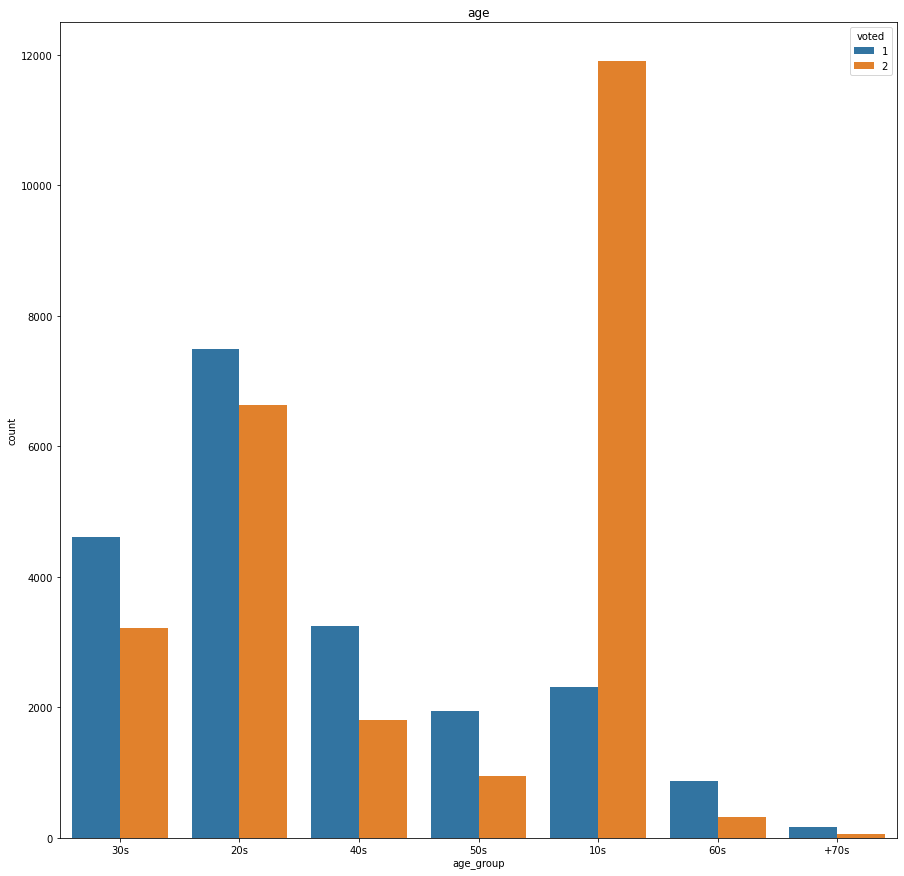

In [19]:
sns.countplot(data=train,x='age_group',hue='voted')
plt.title("age")

* 투표 안한 데이터가 더 많아 -> 비율로 시각화

In [20]:
def draw_piechart(col_name,fs=3):
    k = train[col_name].value_counts().keys()
    v = train[col_name].value_counts().values
    len_k = len(k)
    fig = plt.figure(figsize=(fs*len_k,fs*len_k))
    colors = sns.color_palette('hls',len(k))
    row = math.ceil(len_k/2)
    for i in range(len_k):
        ax_tmp = 'ax' + str(i)
        ax_tmp = fig.add_subplot(row,2,i+1)
        tmp = train[train[col_name]==k[i]].voted.value_counts(sort=False)
        ax_tmp.set_title(k[i],fontweight=600)
        ax_tmp.pie(tmp.values,labels=tmp.keys(),autopct='%.1f%%',
                   colors=colors,counterclock=False,startangle=90)
    plt.show()

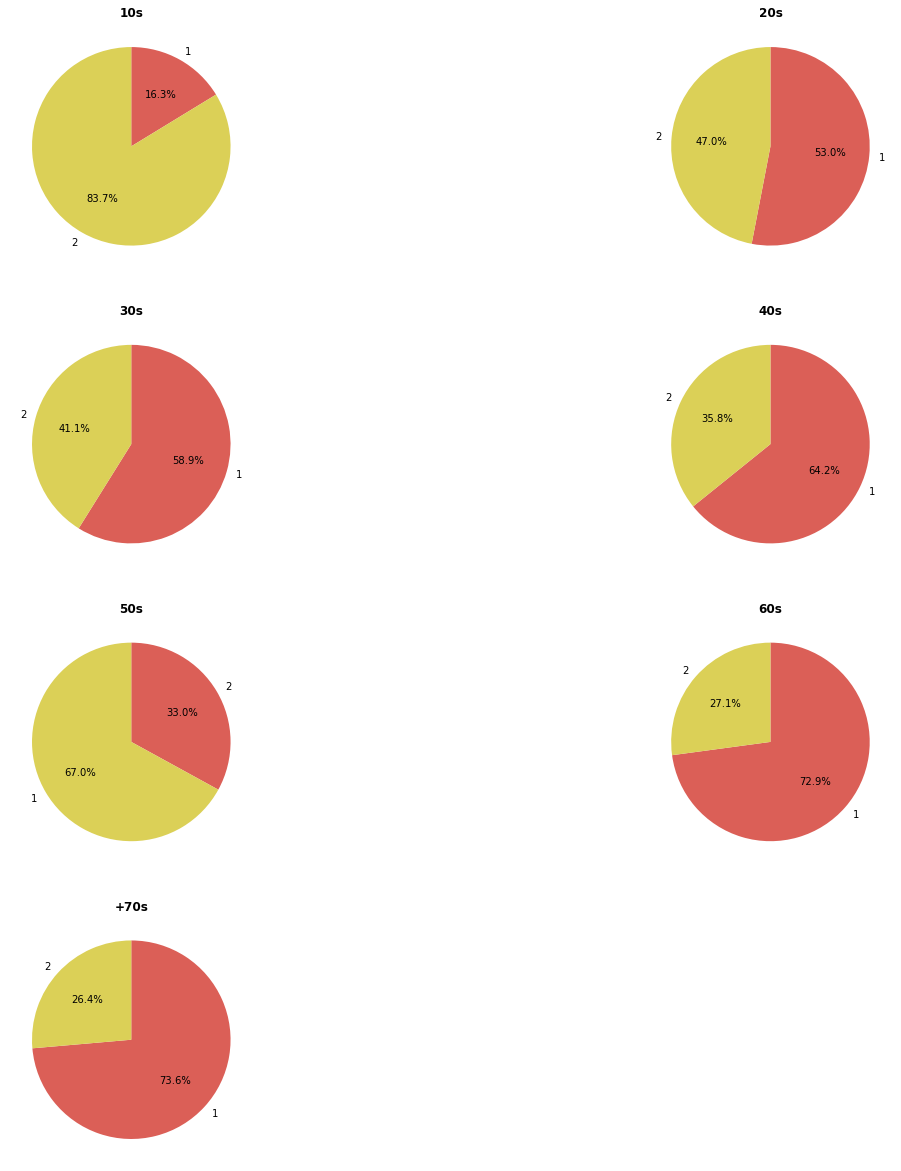

In [21]:
draw_piechart('age_group')

* voted 2 : NO, 1 : Yes
* 나이가 증가할수록 투표율이 높아짐

## education

* 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답

Text(0.5, 1.0, 'education')

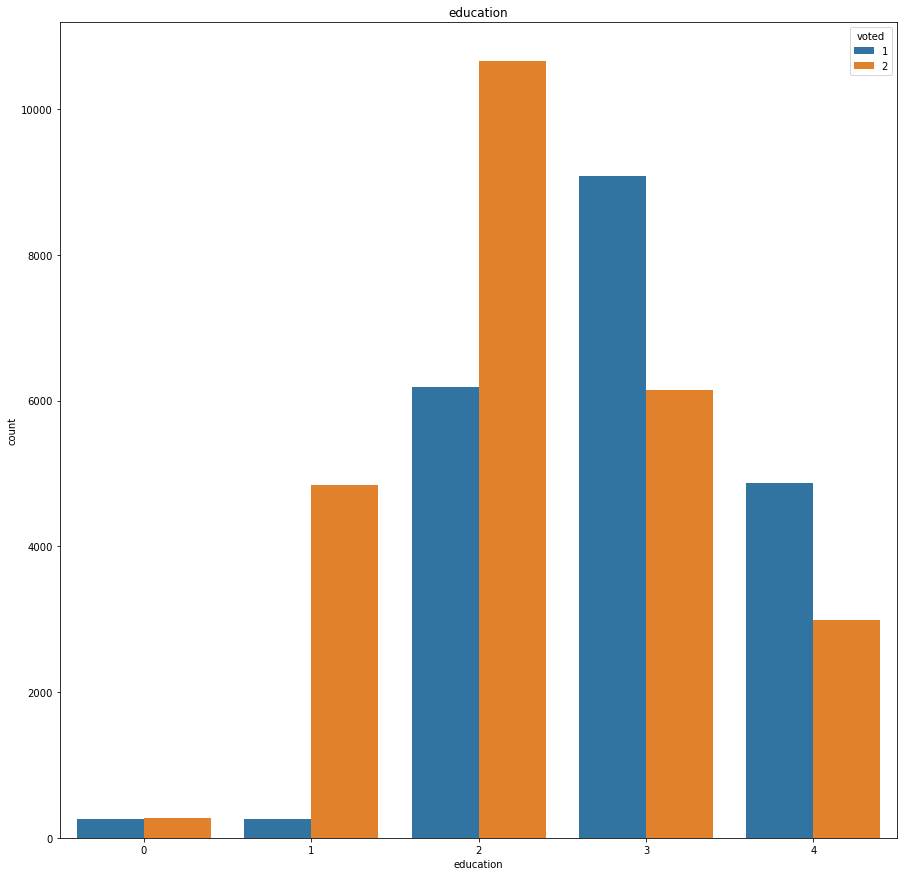

In [22]:
sns.countplot(data=train,x='education',hue='voted')
plt.title("education")

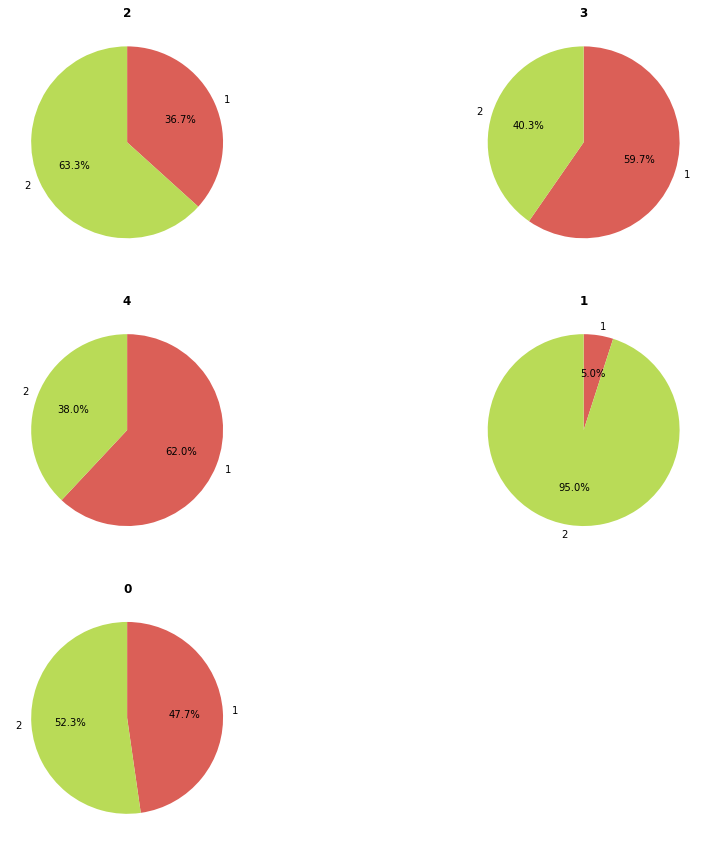

In [23]:
draw_piechart('education')

* 대학부터 투표율이 높다.

## engnat (모국어 영어)

- 1=Yes, 2=No, 0=무응답

Text(0.5, 1.0, 'engnat')

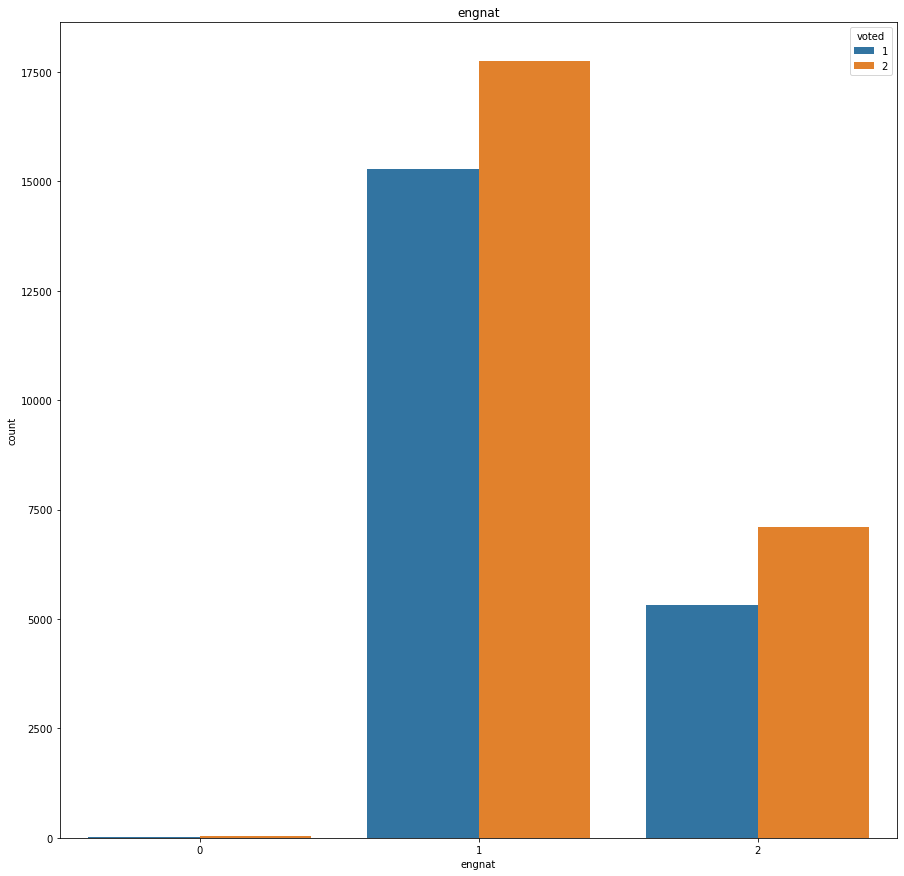

In [24]:
sns.countplot(data=train,x='engnat',hue='voted')
plt.title("engnat")

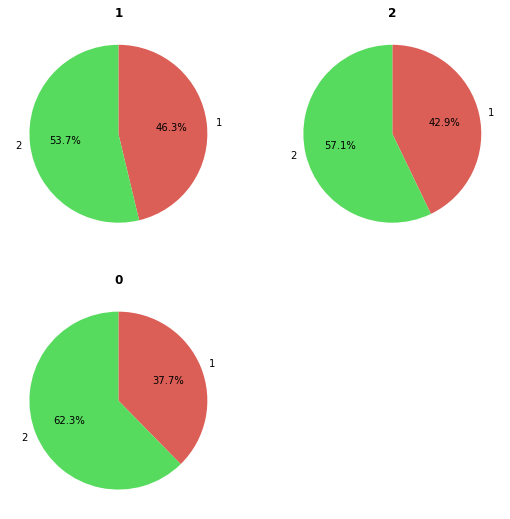

In [25]:
draw_piechart('engnat')

- 투표율과 크게 관련 없어보임

## family size

In [34]:
# family size 이상치 제거함
train['familysize'].sort_values(ascending=False) # 이상치 제거
train_data = train[train['familysize'] < 30]

Text(0.5, 1.0, 'familysize')

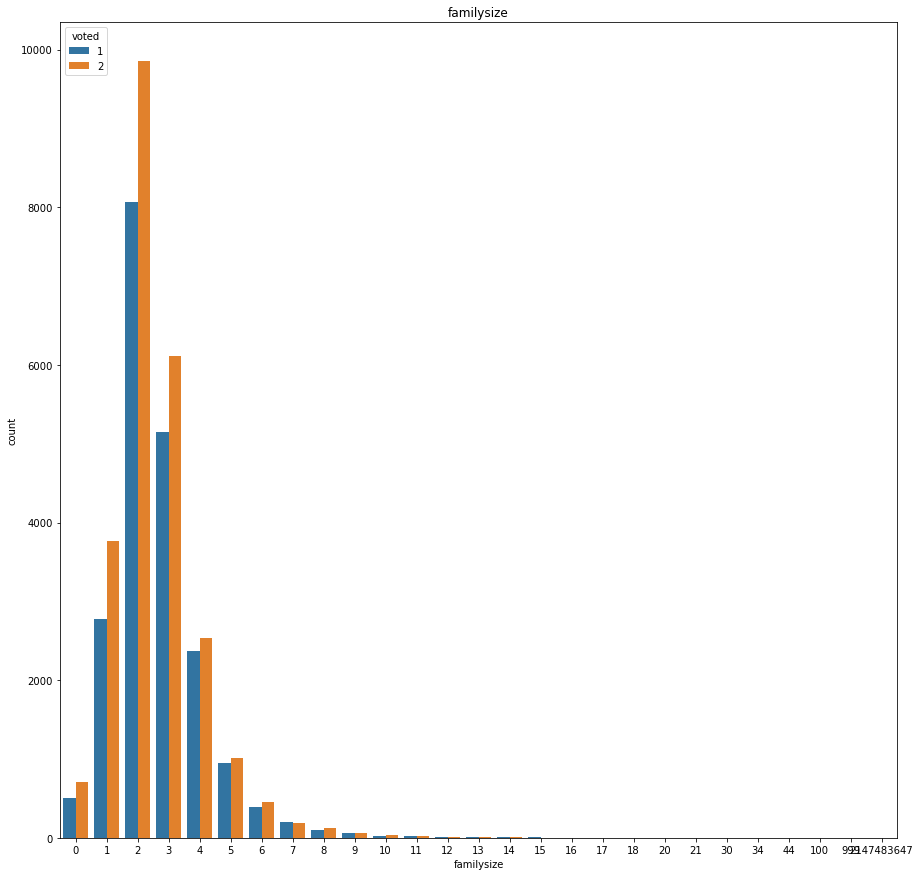

In [26]:
sns.countplot(data=train,x='familysize',hue='voted')
plt.title("familysize")

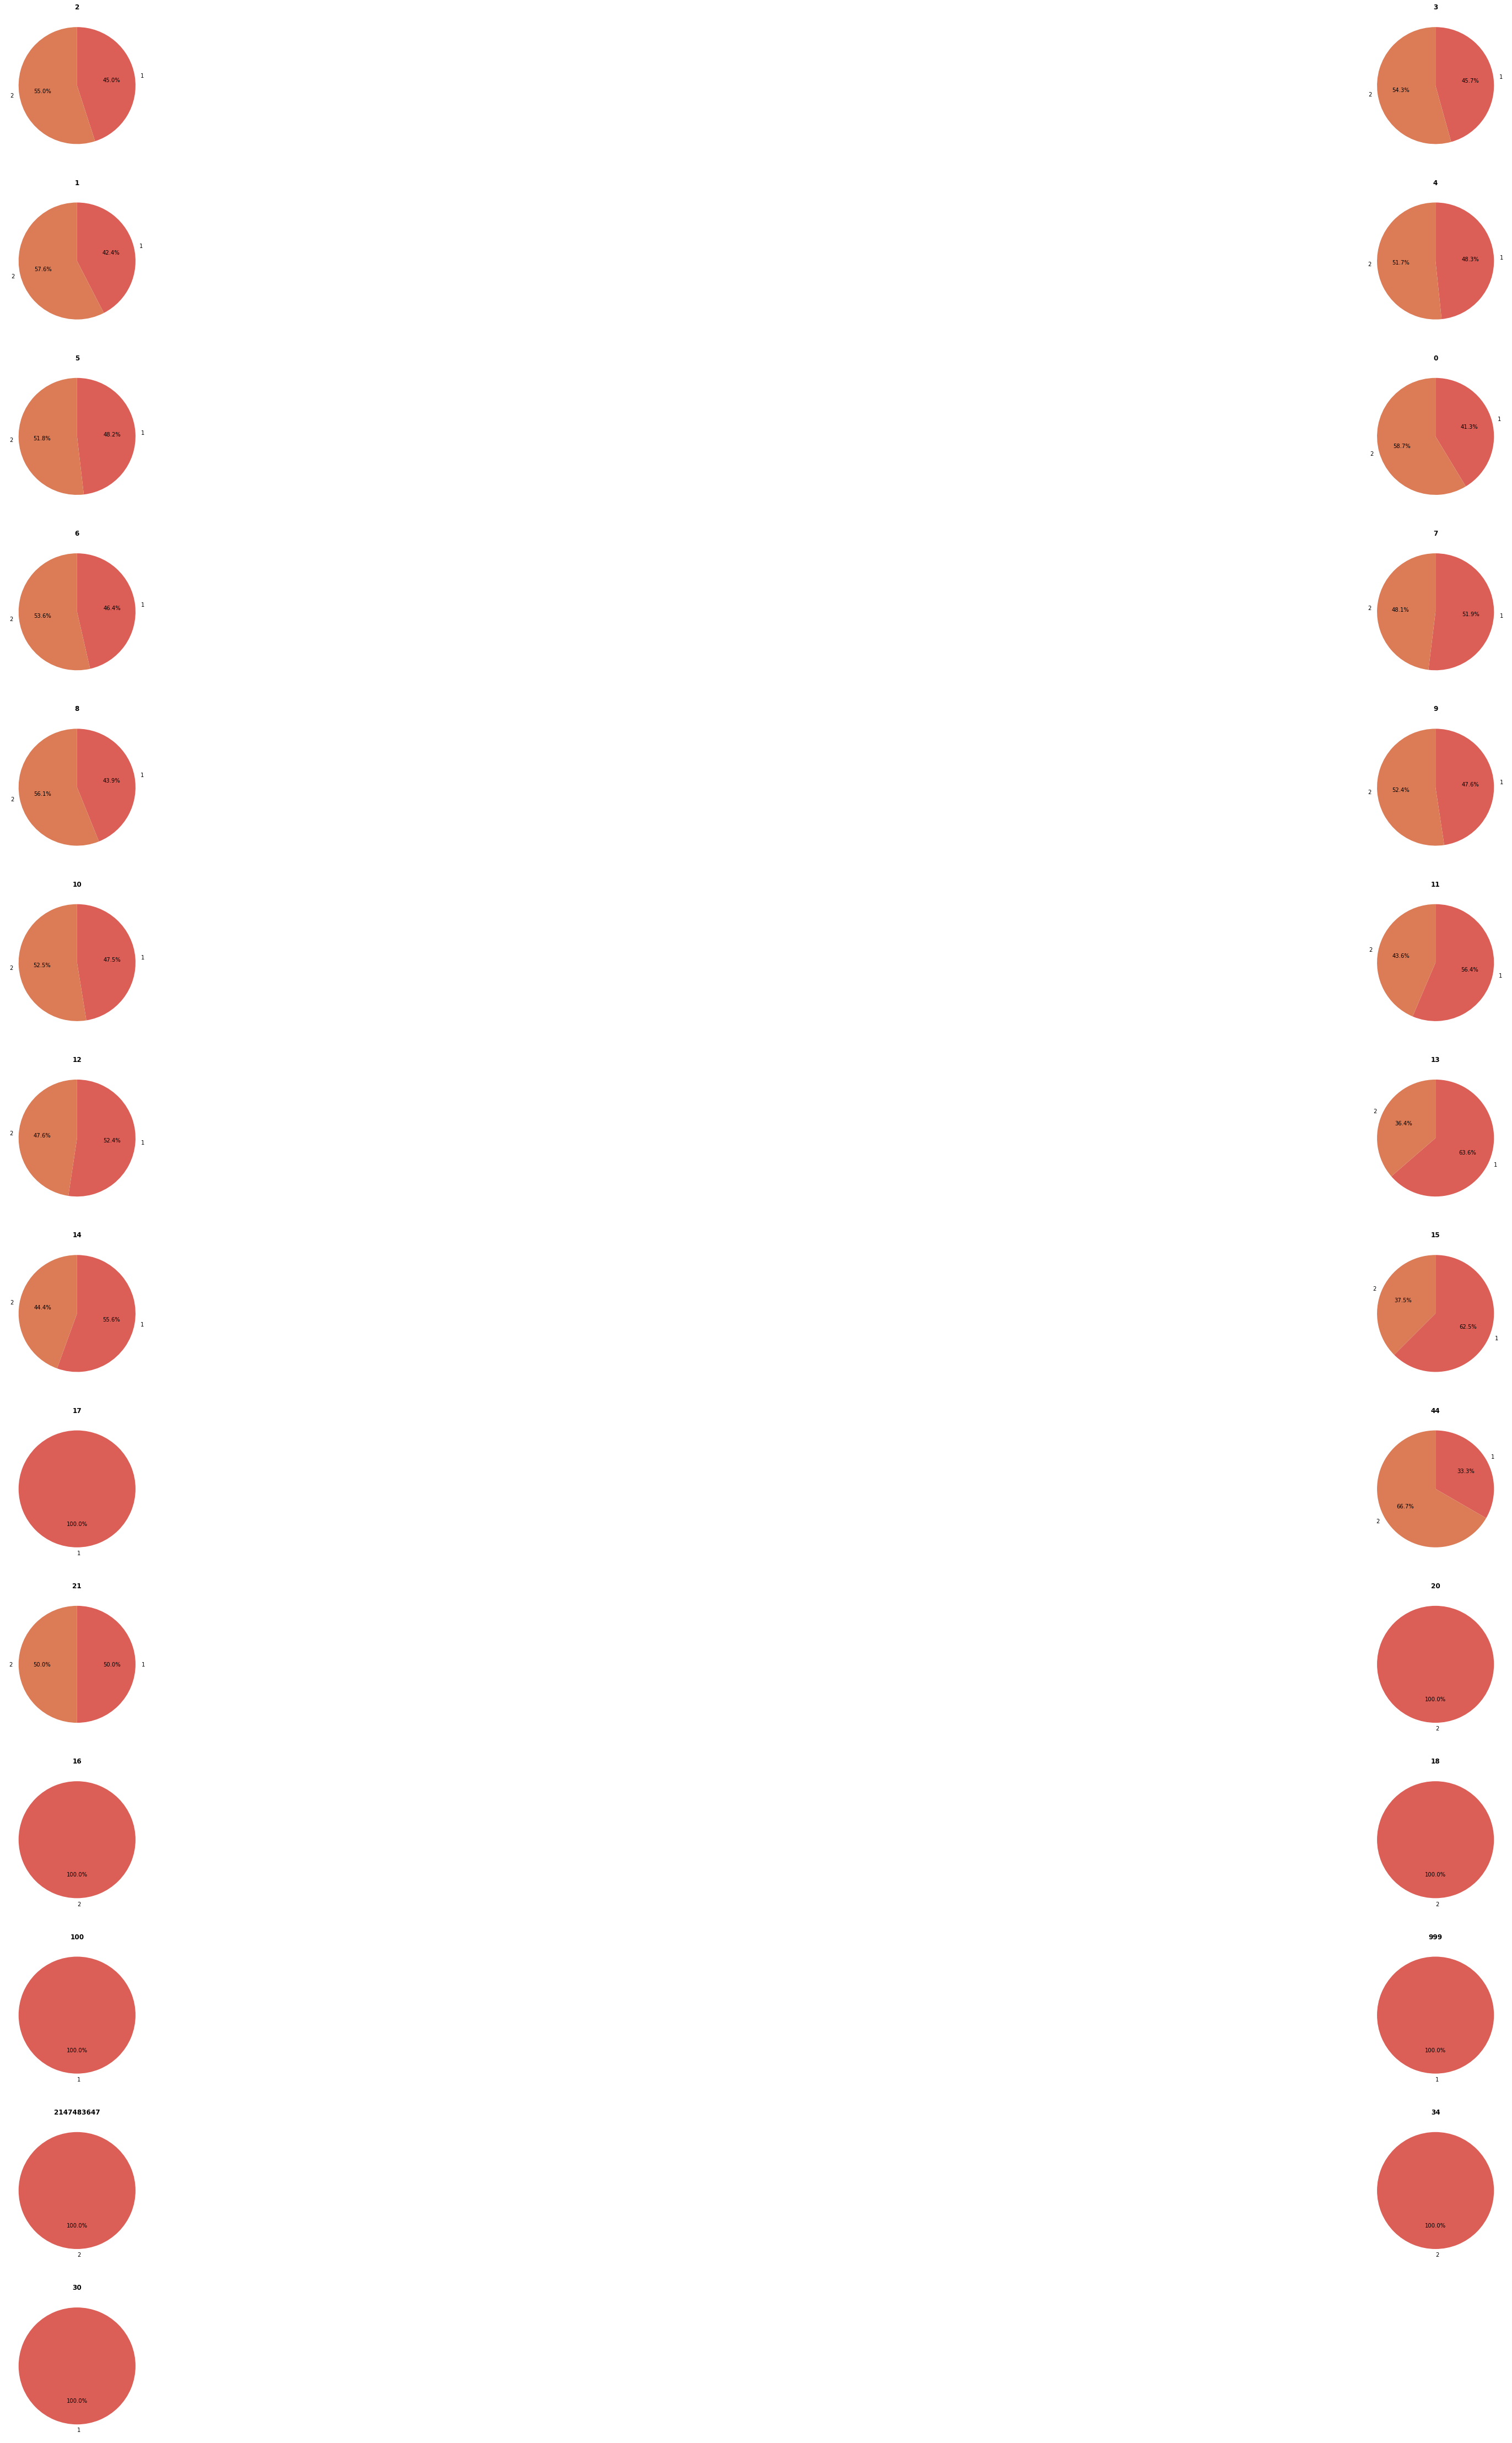

In [27]:
draw_piechart('familysize')

## gender

Text(0.5, 1.0, 'gender')

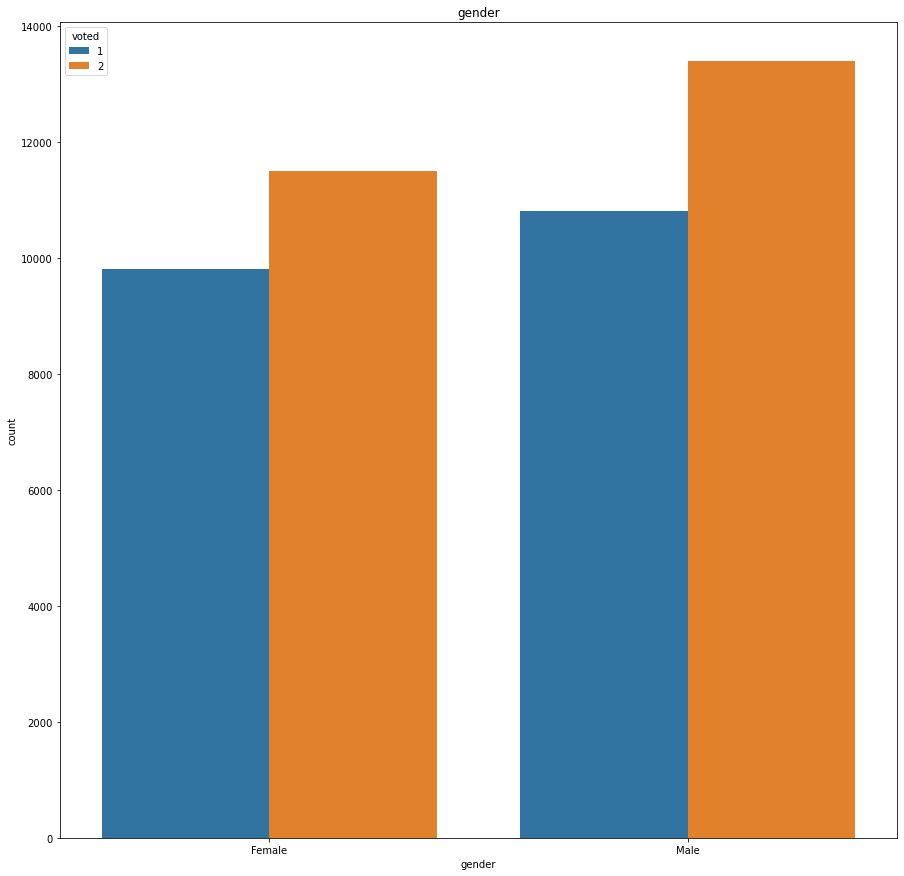

In [28]:
sns.countplot(data=train,x='gender',hue='voted')
plt.title("gender")

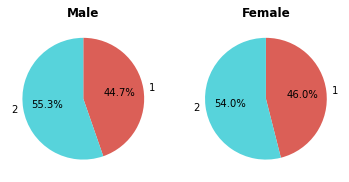

In [29]:
draw_piechart('gender')

## hand
* 1 = Right, 2 = Left, 3 = Both, 0 = 무응답

Text(0.5, 1.0, 'hand')

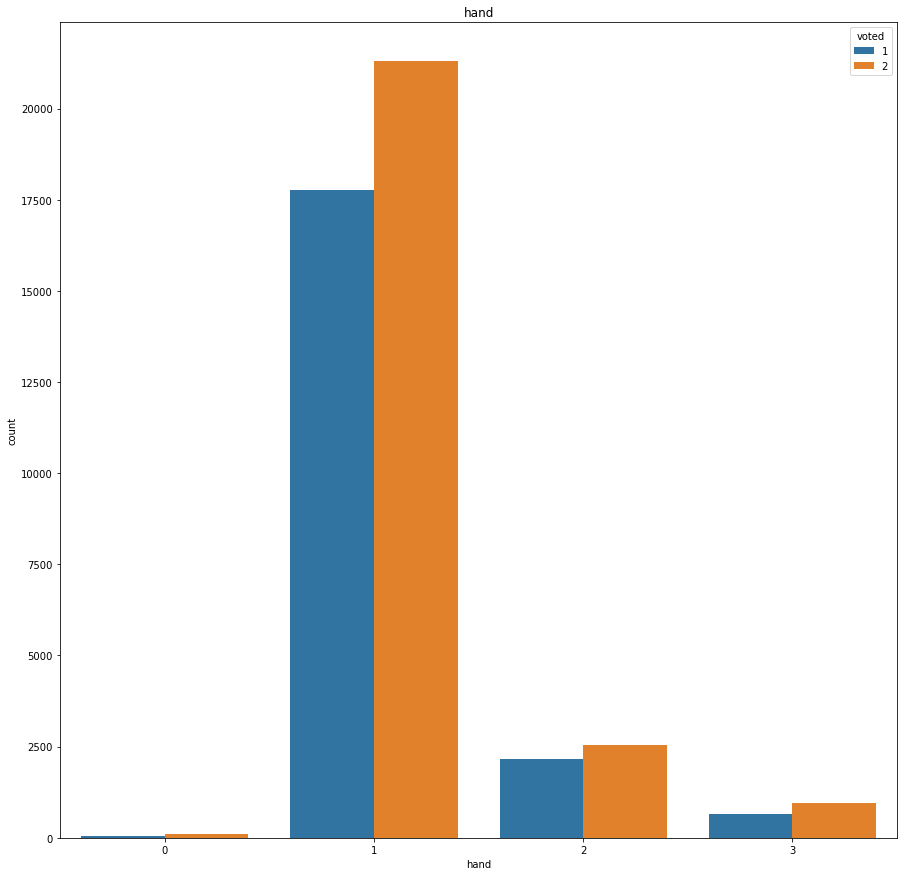

In [30]:
sns.countplot(data=train,x='hand',hue='voted')
plt.title("hand")

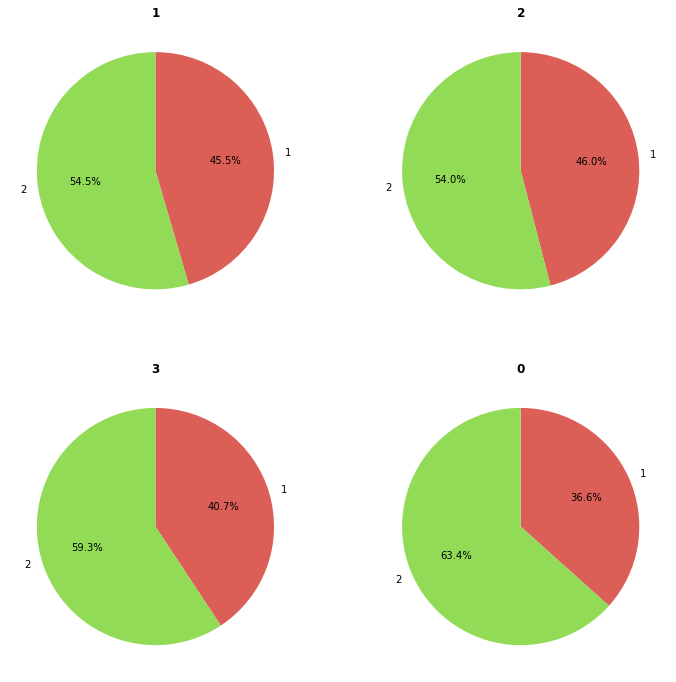

In [31]:
draw_piechart('hand')

## married

- 1=Never married, 2=Currently married, 3=Previously married, 0=Other

Text(0.5, 1.0, 'married')

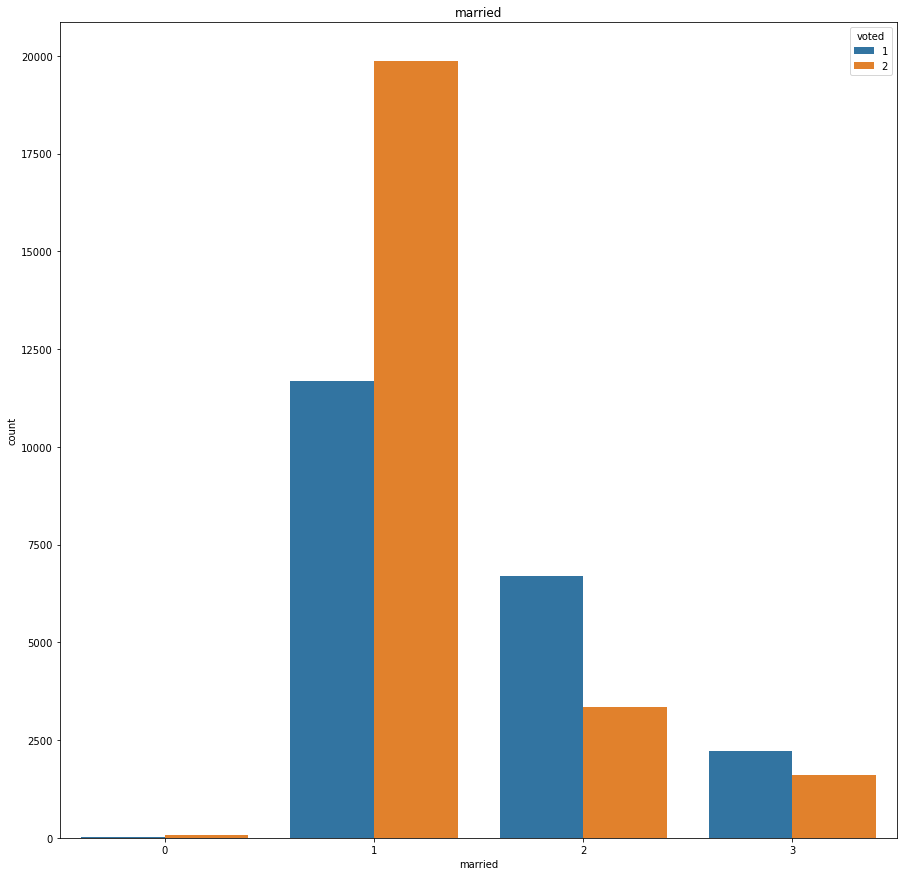

In [32]:
sns.countplot(data=train,x='married',hue='voted')
plt.title("married")

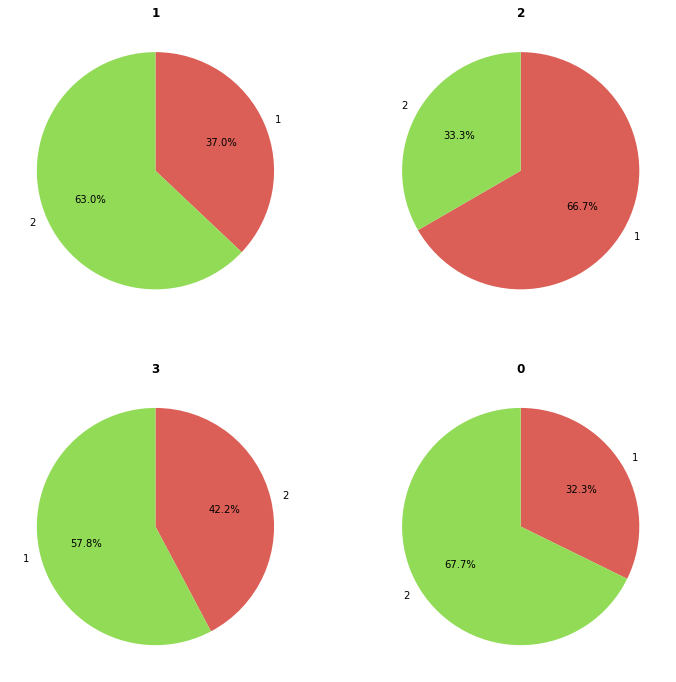

In [33]:
draw_piechart('married')

- 나이와 연관...?

##  race
- Asian, Arab, Black, Indigenous Australian, Native American, White, Other

Text(0.5, 1.0, 'race')

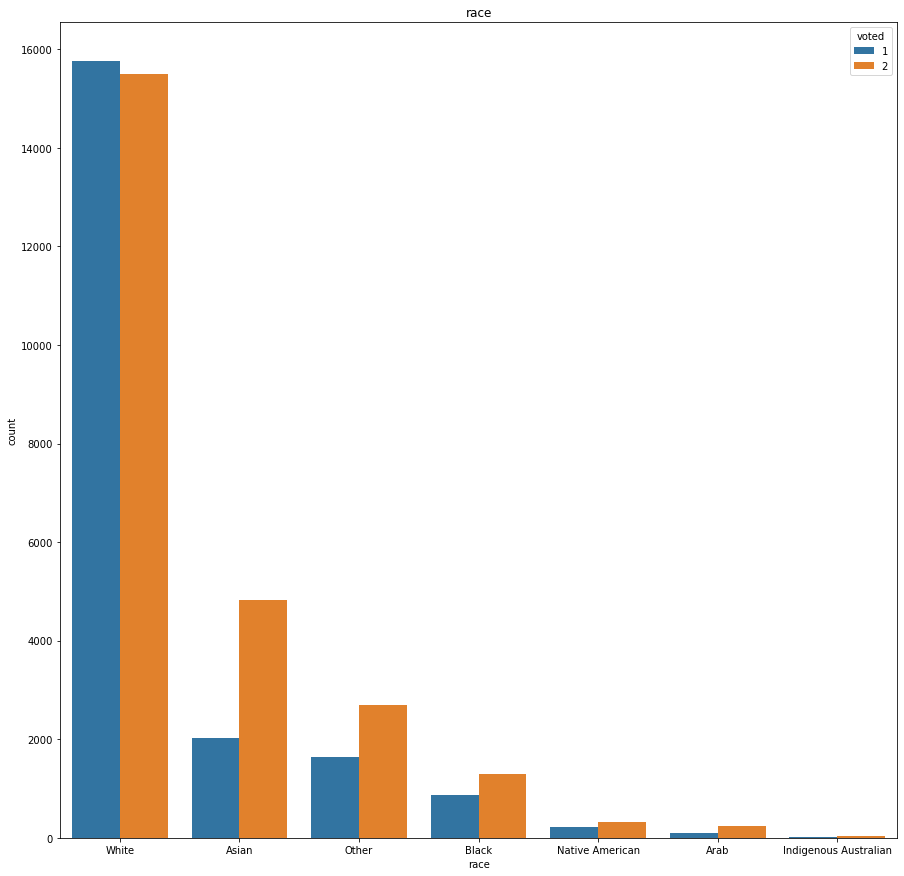

In [34]:
sns.countplot(data=train,x='race',hue='voted')
plt.title("race")

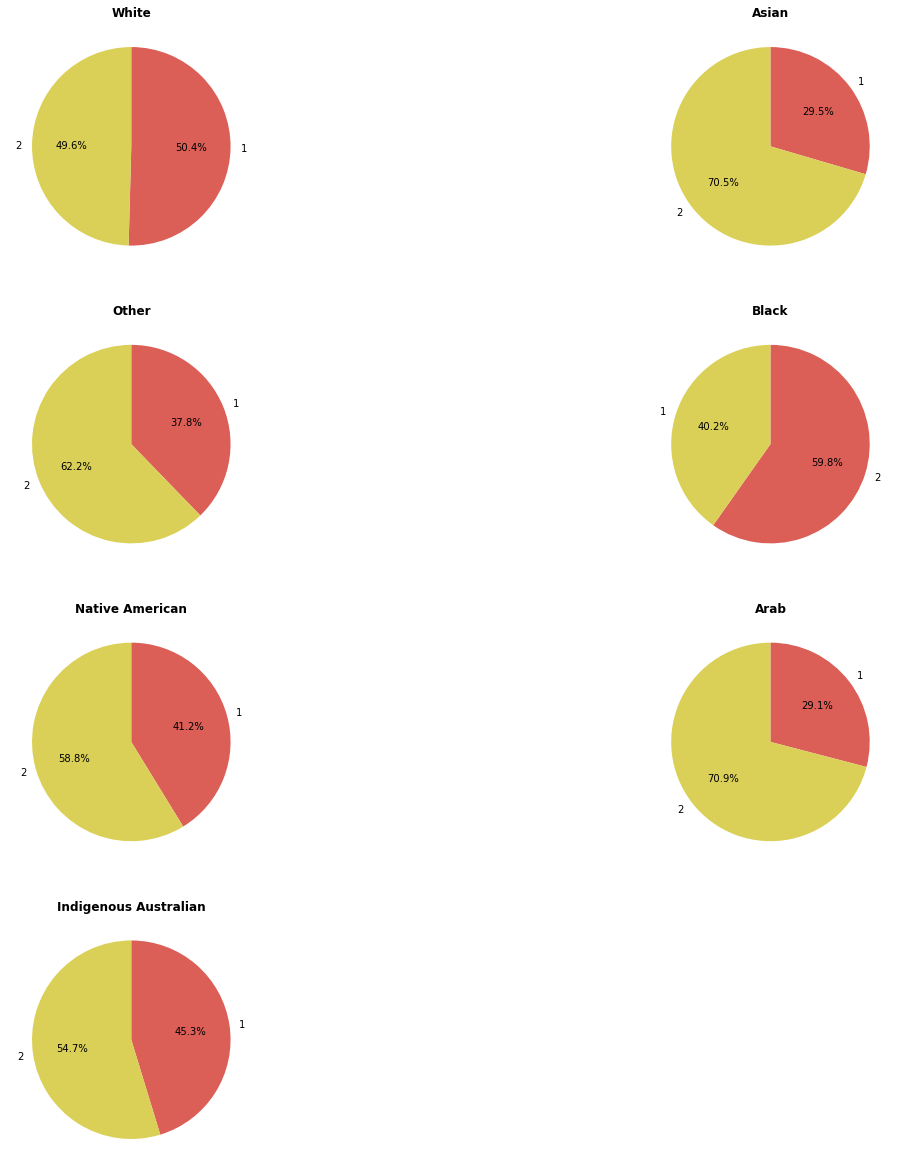

In [35]:
draw_piechart('race')

- 인종에 따른 차이가 보임

## religion
- Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other

Text(0.5, 1.0, 'religion')

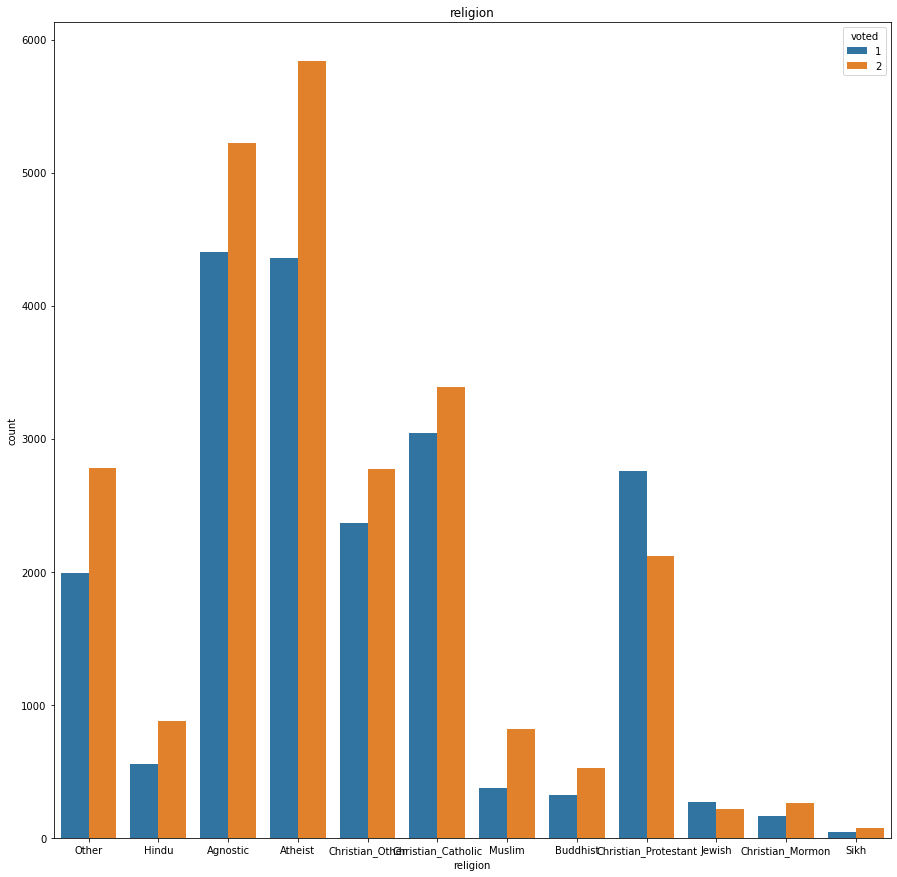

In [36]:
sns.countplot(data=train,x='religion',hue='voted')
plt.title("religion")

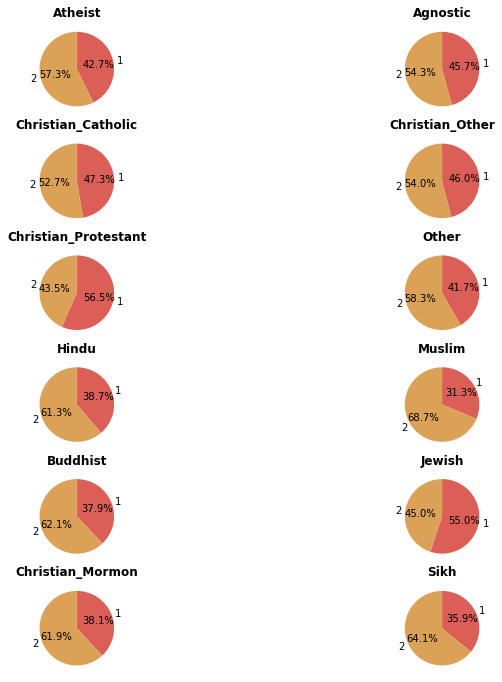

In [37]:
draw_piechart('religion',fs=1)

## urban
- 1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

Text(0.5, 1.0, 'urban')

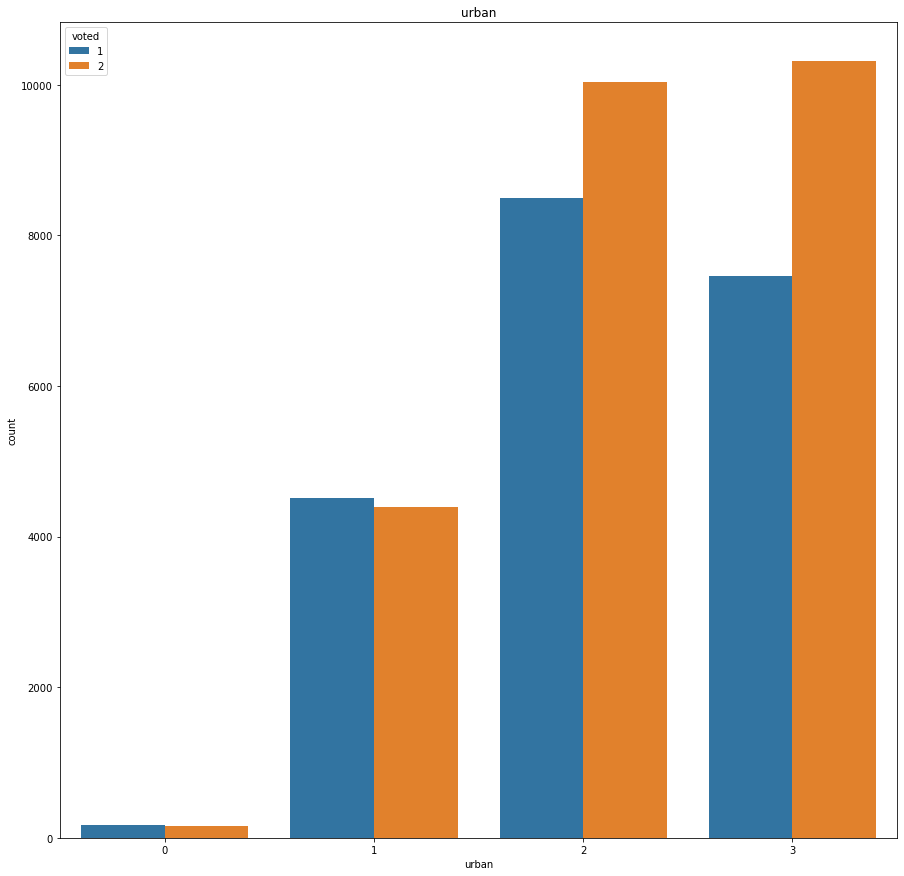

In [38]:
sns.countplot(data=train,x='urban',hue='voted')
plt.title("urban")

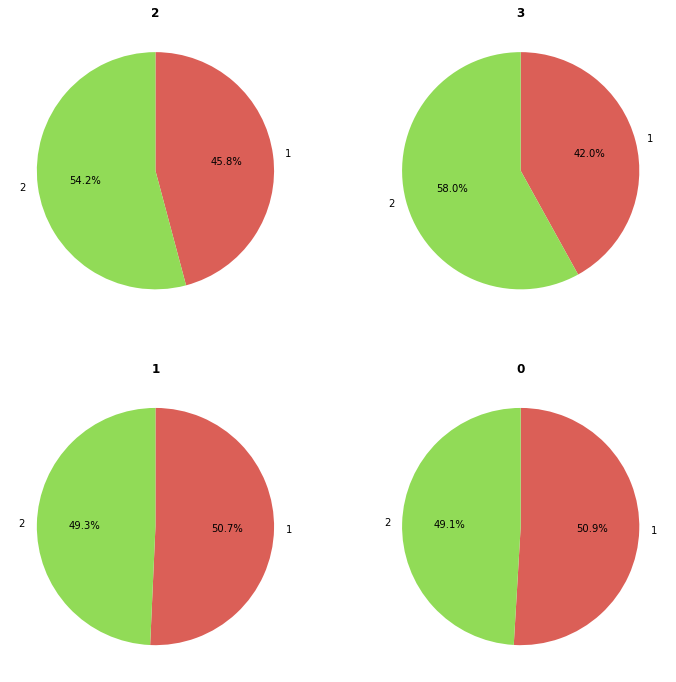

In [39]:
draw_piechart('urban')

- 도시로 갈 수록 투표율 약간 저하

## wr_ : 실존하는 해당 단어의 정의를 앎
- 1 : Yes, 0 : No

In [40]:
keys = train.keys()
tmp_col = keys[keys.str.startswith('wr')]

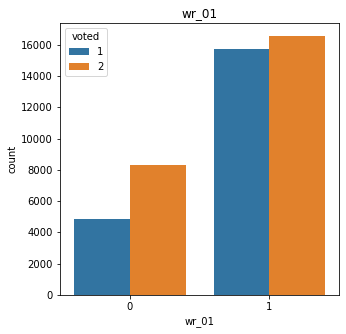

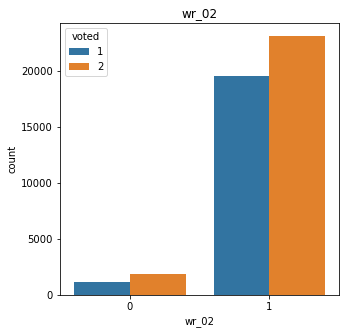

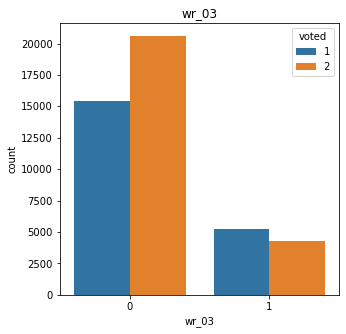

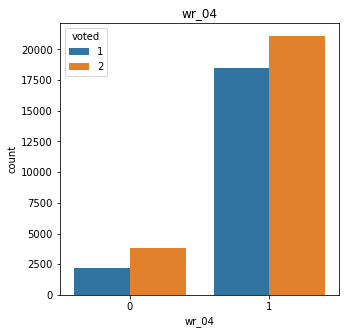

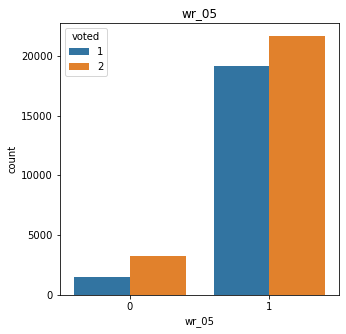

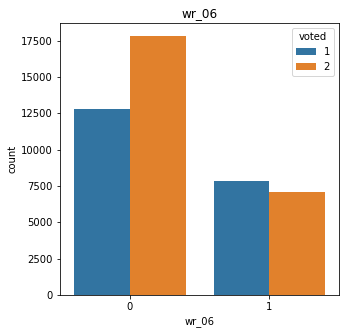

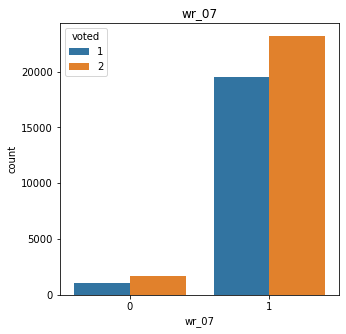

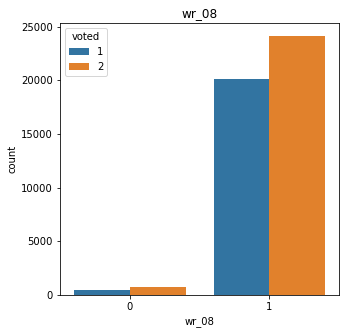

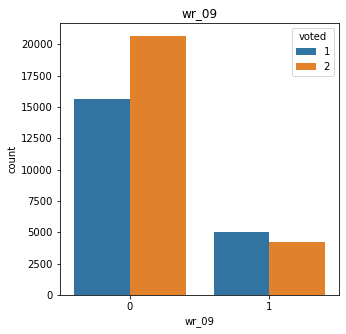

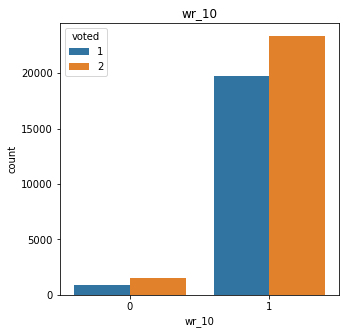

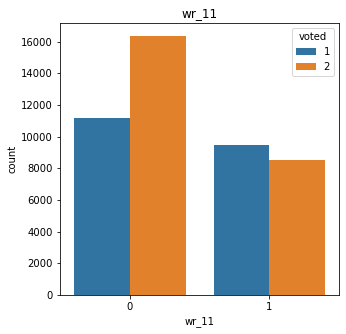

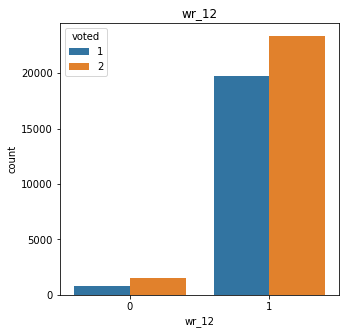

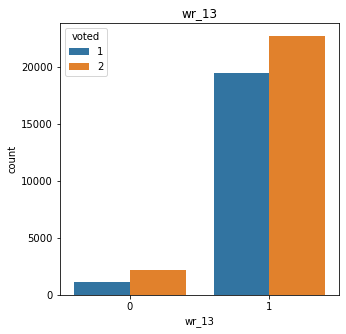

In [41]:
plt.rcParams['figure.figsize']=[5,5]
for c in tmp_col:
    sns.countplot(data=train,x=c,hue='voted')
    plt.title(c)
    plt.show()

wr_01


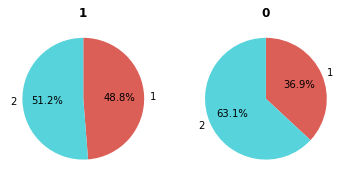

wr_02


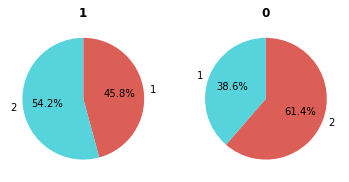

wr_03


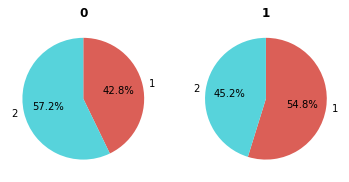

wr_04


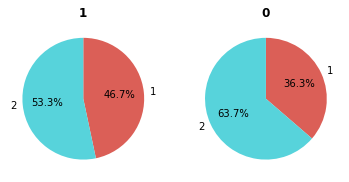

wr_05


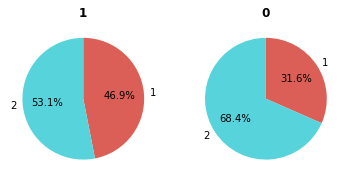

wr_06


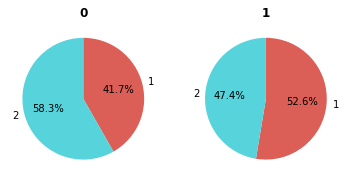

wr_07


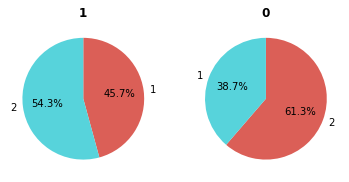

wr_08


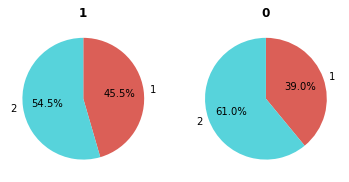

wr_09


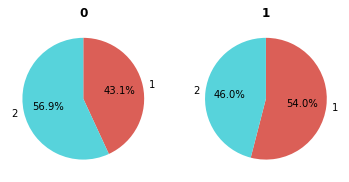

wr_10


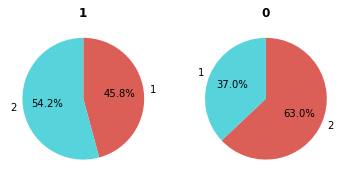

wr_11


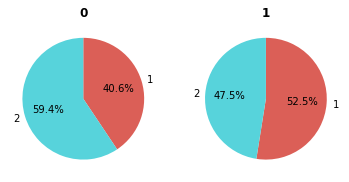

wr_12


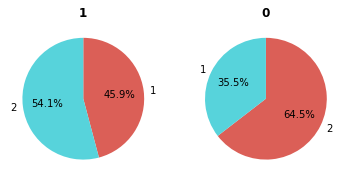

wr_13


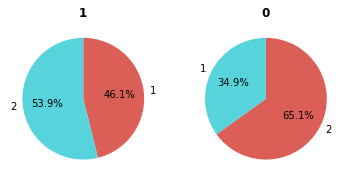

In [42]:
for c in tmp_col:
    print(c)
    draw_piechart(c)

- 주로 단어를 알고있을 때, 투표할 가능성이 높다.

## wf_

In [43]:
keys = train.keys()
tmp_col = keys[keys.str.startswith('wf')]

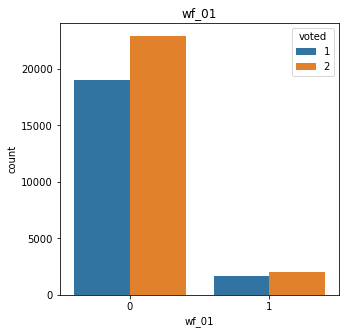

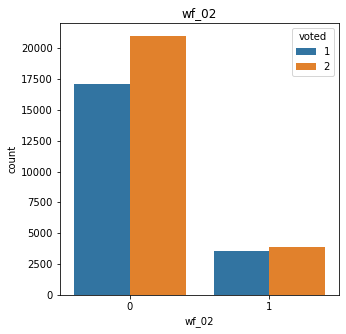

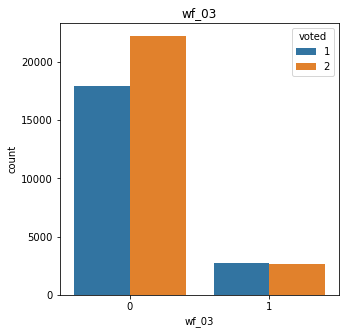

In [44]:
plt.rcParams['figure.figsize']=[5,5]
for c in tmp_col:
    sns.countplot(data=train,x=c,hue='voted')
    plt.title(c)
    plt.show()

wf_01


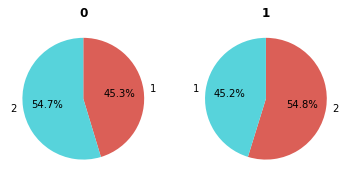

wf_02


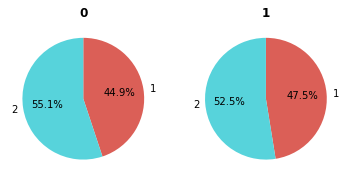

wf_03


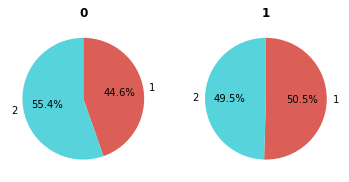

In [45]:
for c in tmp_col:
    print(c)
    draw_piechart(c)

## tp columns

In [56]:
states = ['Extraverted,\nenthusiastic', 'Critical,\nquarrelsome', 'Dependable,\nself-disciplined', 'Anxious,\neasily upset', 
          'Open to new\nexperiences, complex', 'Reserved,\nquiet', 'Sympathetic,\nwarm', 'Disorganized,\ncareless', 
          'Calm,\nemotionally stable', 'Conventional,\nuncreative']

tp = []
for c, s in zip(train[tp_col].columns, states):
    print("---- %s ---" % c)
    print(train[c].value_counts())
    tp_label = {0:'매우 긍정', 1:'긍정', 2:'다소 긍정', 3:'보통', 4:'다소 부정', 5:'부정', 6:'매우 부정', 7:'무응답'}
    temp = train[c].value_counts().reset_index().replace({'index':tp_label}).set_index('index')
    temp.columns = [s]
    temp = temp.transpose()
    tp.append(temp)
    
tp_df = pd.concat(tp)

---- tp01 ---
1    9014
5    7942
2    7877
6    6041
4    5900
0    4783
3    3692
7     283
Name: tp01, dtype: int64
---- tp02 ---
2    12498
1     9208
0     5438
5     5340
6     4614
4     4198
3     3921
7      315
Name: tp02, dtype: int64
---- tp03 ---
1    13488
0    11567
2     8777
4     4053
3     3483
5     2515
6     1288
7      361
Name: tp03, dtype: int64
---- tp04 ---
2    10189
5     7277
6     7078
1     6752
0     5437
4     4754
3     3710
7      335
Name: tp04, dtype: int64
---- tp05 ---
0    15772
1    13681
2     8775
3     2750
4     2513
5     1243
6      507
7      291
Name: tp05, dtype: int64
---- tp06 ---
2    9445
0    8912
1    8640
6    4736
4    4714
5    4664
3    4126
7     295
Name: tp06, dtype: int64
---- tp07 ---
1    11689
2     9914
0     9811
3     4339
4     3968
5     3129
6     2345
7      337
Name: tp07, dtype: int64
---- tp08 ---
2    9800
6    9651
5    7939
4    5730
1    4861
3    3965
0    3184
7     402
Name: tp08, dtype: int64
---- tp0

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from c

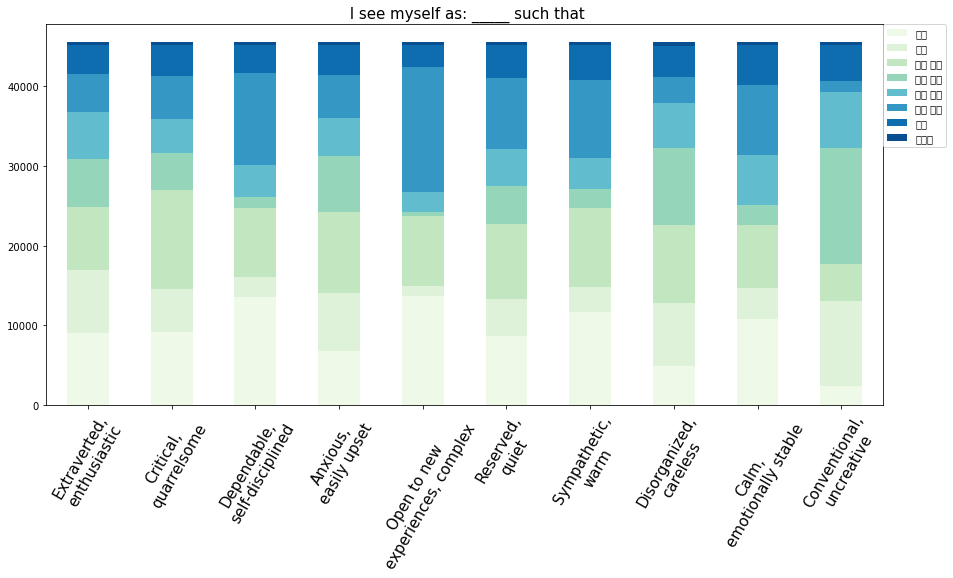

In [58]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import platform

colors = sns.color_palette("GnBu", n_colors=len(qa))
cmap1 = ListedColormap(colors)
tp_df.plot.bar(stacked=True, figsize=(15,7), colormap=cmap1)
plt.xticks(fontsize =15, rotation=60)
plt.title(" "'I see myself as:'" _____ such that", fontsize=15)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

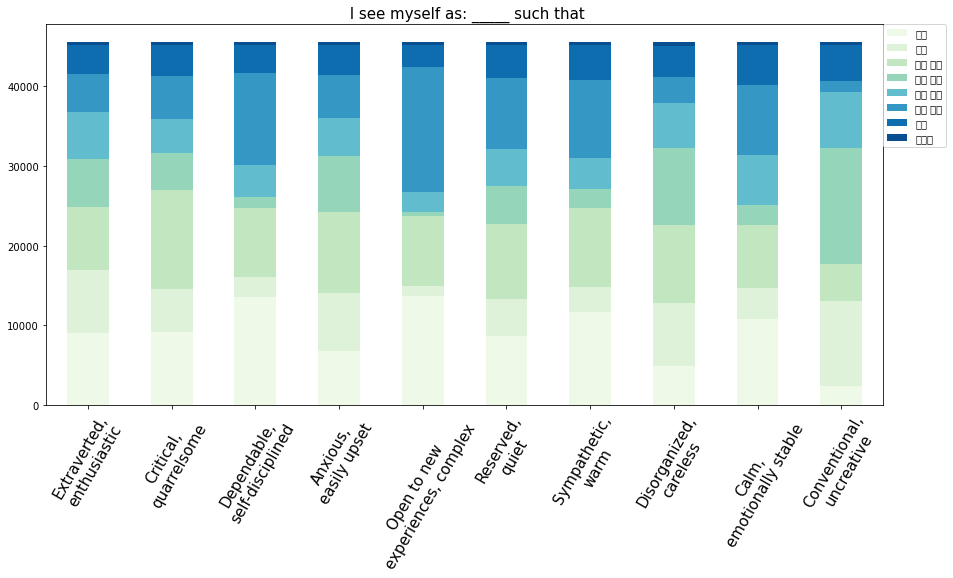

In [59]:
colors = sns.color_palette("GnBu", n_colors=len(qa))
cmap1 = ListedColormap(colors)
tp_df.plot.bar(stacked=True, figsize=(15,7), colormap=cmap1)
plt.xticks(fontsize =15, rotation=60)
plt.title(" "'I see myself as:'" _____ such that", fontsize=15)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

# Feature Engineering

x_train = x값
y_train = voted
dataset = [x_train, test]

In [52]:
train.info

<bound method DataFrame.info of        QaA   QaE  QbA   QbE  QcA   QcE  QdA   QdE  QeA   QeE  ... wr_04  \
index                                                         ...         
0      3.0   363  4.0  1370  5.0   997  1.0  1024  2.0  1577  ...     0   
1      5.0   647  5.0  1313  3.0  3387  5.0  2969  1.0  4320  ...     1   
2      4.0  1623  1.0  1480  1.0  1021  4.0  3374  5.0  1333  ...     1   
3      3.0   504  3.0  2311  4.0   992  3.0  3245  1.0   357  ...     0   
4      1.0   927  1.0   707  5.0   556  2.0  1062  1.0  1014  ...     1   
...    ...   ...  ...   ...  ...   ...  ...   ...  ...   ...  ...   ...   
45527  2.0  1050  5.0   619  4.0   328  1.0   285  1.0   602  ...     1   
45528  2.0   581  3.0  1353  4.0  1164  1.0   798  3.0  1680  ...     1   
45529  4.0   593  1.0   857  1.0  1047  4.0  1515  5.0  1690  ...     1   
45530  1.0   747  3.0  1331  4.0   892  2.0  1281  1.0  1328  ...     1   
45531  3.0   496  5.0  1827  5.0   754  3.0  1117  1.0   432  ...   

In [4]:
# y 제거
x_train = train.copy()
x_train.drop('voted', axis=1, inplace = True)
y_train = train['voted']

In [5]:
dataset = [x_train, test]

## 마키아밸리 test FE

In [7]:
from string import ascii_lowercase
questions = [i for i in list(ascii_lowercase)[:20]]
answers = [('Q'+i+'A') for i in questions]

In [8]:
for data in dataset:
  data['T'] = data['QcA'] - data['QfA'] + data['QoA'] - data['QrA'] + data['QsA']
  data['V'] = data['QbA'] - data['QeA'] + data['QhA'] + data['QjA'] + data['QmA'] - data['QqA']
  data['M'] = - data['QkA']

In [9]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for data in dataset:
  for flip in flipping_columns: 
    data[flip] = 6 - data[flip]

In [10]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for data in dataset:
  for flip in flipping_secret_columns: 
    data[flip] = 6 - data[flip]

In [11]:
for data in dataset:
  data['Mach_score'] = data[answers].mean(axis = 1)

delay_var delay 분산

In [15]:
for data in dataset:
  data['delay'] = data[[('Q'+i+'E') for i in questions]].sum(axis=1)
  data['delay'] = data['delay'] ** (1/10)
  data['delay_var'] = data['delay'].var()

# delay_var 추가함

In [16]:
# Q_A들끼리의 모든 조합

# %s_dv_%s : mach_%s_dv_%s

from itertools import combinations
Ancoms = list(combinations(answers, 2))
for data in dataset:
  for a,b in Ancoms:
    data['mach_%s_dv_%s'%(a,b)] = data[a]/data[b]

Q_A, Q_E 모두 drop

In [17]:
for data in dataset:
  data.drop([('Q'+i+'A') for i in questions], axis = 1, inplace = True)
  data.drop([('Q'+i+'E') for i in questions], axis = 1, inplace = True)

In [18]:
# hand 피처 drop

for data in dataset:
  data.drop('hand', axis=1, inplace = True)

## wr_

In [19]:
wr_list = [('wr_0'+str(i)) for i in range(1,10)]
wr_list.extend([('wr_'+str(i)) for i in range(10,14)])

# 대부분의 사람들이 아는 단어
wr_no_need = [i for i in wr_list if i not in ['wr_01', 'wr_03', 'wr_06', 'wr_09', 'wr_11']]

In [20]:
wr_list

['wr_01',
 'wr_02',
 'wr_03',
 'wr_04',
 'wr_05',
 'wr_06',
 'wr_07',
 'wr_08',
 'wr_09',
 'wr_10',
 'wr_11',
 'wr_12',
 'wr_13']

In [21]:
wr_no_need

['wr_02', 'wr_04', 'wr_05', 'wr_07', 'wr_08', 'wr_10', 'wr_12', 'wr_13']

wr_no_need 삭제

In [22]:
for data in dataset:
  data.drop(wr_no_need, axis=1, inplace = True)

# TIPI 추가할 것

- 마키아벨리즘 5가지 성격 분류 ( OCEAN 모델 )
- 경험에 대한 개방성(Openness to experience)
- 성실성(Conscientiousness)
- 외향성(Extraversion)
- 우호성(Agreeableness)
- 신경성(Neuroticism)

In [48]:
dataset

[       age_group  education  engnat  familysize  gender  married  race  \
 index                                                                    
 0              3          2       1           4       0        3     6   
 1              2          4       2           3       0        1     1   
 2              3          3       1           3       1        2     6   
 3              2          4       2           0       0        1     1   
 4              2          3       1           2       1        2     6   
 ...          ...        ...     ...         ...     ...      ...   ...   
 45527          1          2       1           1       0        1     6   
 45528          3          2       1           2       1        1     6   
 45529          1          2       1           1       0        1     6   
 45530          4          4       1           2       1        1     6   
 45531          2          2       1           3       1        1     6   
 
        religion  urban

In [23]:
for data in dataset:
  data['Ex'] = data['tp01']-data['tp06']
  data['Ag'] = data['tp07']-data['tp02']
  data['Con'] = data['tp03']-data['tp08']
  data['Es'] =data['tp09']-data['tp04']
  data['Op'] =data['tp05']-data['tp10']

In [24]:
# 모든 tp 삭제
for data in dataset:
  data.drop([('tp0'+str(i)) for i in range(1,10)], axis=1, inplace = True)
  data.drop('tp10', axis = 1, inplace = True)

In [25]:
# test의 index 저장 후 모두 삭제
index = test['index']
for data in dataset:
  data.drop('index', axis = 1, inplace = True)

KeyError: 'index'

In [28]:
# 라벨인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
needenco = ['age_group', 'gender', 'race', 'religion']
for i in needenco:
  x_train[i] = encoder.fit_transform(x_train[i])
  test[i] = encoder.transform(test[i])

In [29]:
x_train.to_csv('x_train.csv')
test.to_csv('test.csv')

In [30]:
x_train

,age_group,education,engnat,familysize,gender,married,race,religion,urban,wf_01,...,mach_QqA_dv_QsA,mach_QqA_dv_QtA,mach_QrA_dv_QsA,mach_QrA_dv_QtA,mach_QsA_dv_QtA,Ex,Ag,Con,Es,Op
index,,,,,,,,,,,,,,,,,,,,,
0,3,2,1,4,0,3,6,10,1,0,...,2.000000,4.0,2.000000,4.00,2.00,1,5,-2,3,-1
1,2,4,2,3,0,1,1,7,3,0,...,0.250000,1.0,1.250000,5.00,4.00,-1,2,-4,0,-3
2,3,3,1,3,1,2,6,10,2,0,...,1.000000,1.0,2.000000,2.00,1.00,-2,-1,-5,-4,0
3,2,4,2,0,0,1,1,7,3,0,...,0.750000,0.6,0.500000,0.40,0.80,-1,-3,-2,0,-2
4,2,3,1,2,1,2,6,0,1,0,...,1.000000,0.5,1.000000,0.50,0.50,-1,-1,-5,-4,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,1,2,1,1,0,1,6,8,3,0,...,0.800000,1.0,1.000000,1.25,1.25,-5,1,6,5,-2
45528,3,2,1,2,1,1,6,1,1,0,...,1.000000,1.0,0.750000,0.75,1.00,-1,1,-2,-2,-4
45529,1,2,1,1,0,1,6,5,2,0,...,0.333333,1.0,0.333333,1.00,3.00,3,-4,0,-3,-6


In [31]:
test

,age_group,education,engnat,familysize,gender,married,race,religion,urban,wf_01,...,mach_QqA_dv_QsA,mach_QqA_dv_QtA,mach_QrA_dv_QsA,mach_QrA_dv_QtA,mach_QsA_dv_QtA,Ex,Ag,Con,Es,Op
index,,,,,,,,,,,,,,,,,,,,,
0,1,2,2,3,1,1,6,6,2,0,...,3.000000,1.50,2.000000,1.000000,0.500000,0,1,-2,0,-3
1,1,2,2,2,1,1,5,3,3,0,...,0.666667,0.50,0.333333,0.250000,0.750000,0,0,0,0,0
2,3,3,2,7,1,2,5,5,1,0,...,1.000000,0.60,0.666667,0.400000,0.600000,5,0,1,4,5
3,6,4,1,4,1,2,6,3,2,0,...,0.250000,1.00,1.250000,5.000000,4.000000,-6,-5,-4,-5,-6
4,1,2,1,3,1,1,6,0,2,0,...,0.750000,1.00,0.500000,0.666667,1.333333,6,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,2,3,2,3,0,1,5,3,0,0,...,1.000000,0.50,2.000000,1.000000,0.500000,-3,1,0,1,-5
11379,1,2,2,1,0,1,1,0,2,0,...,0.600000,0.75,1.000000,1.250000,1.250000,-4,0,2,6,-4
11380,3,4,1,4,1,2,6,1,1,0,...,1.000000,2.00,1.000000,2.000000,2.000000,2,-1,-5,-6,-4


### NN용 피처 엔지니어링

In [57]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test_x.csv')

drop_list = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE',
             'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
             'QkE', 'QlE', 'QmE', 'QnE', 'QoE',
             'QpE', 'QqE', 'QrE', 'QsE', 'QtE',
             'index', 'hand', 'gender', 'familysize', 'engnat', 'urban', 'wf_01', 'wf_02', 'wf_03'] 
replace_dict = {'education': str, 'married': str}

train_data['Qb_E']=train_data['QbE']
train_data['Qh_E']=train_data['QhE']
train_data['Qi_E']=train_data['QiE']
train_data['Qj_E']=train_data['QjE']
train_data['Qr_E']=train_data['QrE']
train_data['Qt_E']=train_data['QtE']
test_data['Qb_E']=test_data['QbE']
test_data['Qh_E']=test_data['QhE']
test_data['Qi_E']=test_data['QiE']
test_data['Qj_E']=test_data['QjE']
test_data['Qr_E']=test_data['QrE']
test_data['Qt_E']=test_data['QtE']
train_y = train_data['voted']
train_x = train_data.drop(drop_list + ['voted'], axis=1)                    # 응답시간(Q_E)과 사용하는 손(hand) column drop
test_x = test_data.drop(drop_list, axis=1)                                  # 응답시간(Q_E)과 사용하는 손(hand) column drop

In [58]:
train_x.head(3)

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,...,wr_10,wr_11,wr_12,wr_13,Qb_E,Qh_E,Qi_E,Qj_E,Qr_E,Qt_E
0,3.0,4.0,5.0,1.0,2.0,5.0,2.0,4.0,5.0,4.0,...,1,0,1,1,1370,1095,1142,1287,876,1115
1,5.0,5.0,3.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,...,1,0,1,1,1313,4082,1867,1264,3039,1346
2,4.0,1.0,1.0,4.0,5.0,1.0,4.0,1.0,3.0,2.0,...,1,0,1,1,1480,1016,2653,1569,1327,1409


In [59]:
import random
from datetime import datetime

import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import StratifiedKFold
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from tqdm import tqdm

# 재현성을 위한 Seed 고정
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

train_x = train_x.astype(replace_dict)                      # categorical인데 int type인 column --> str type으로
test_x = test_x.astype(replace_dict)                        # categorical인데 int type인 column --> str type으로
train_x = pd.get_dummies(train_x)                           # one-hot-encoding
test_x = pd.get_dummies(test_x)                             # one-hot-encoding
train_y = 2 - train_y.to_numpy()                            # 1 yse, 2 no --> 1 yes, 0 no

train_x = train_x.to_numpy()
test_x = test_x.to_numpy()
train_y_t = torch.tensor(train_y, dtype=torch.float32)
train_x_t = torch.tensor(train_x, dtype=torch.float32)
test_x_t = torch.tensor(test_x, dtype=torch.float32)

In [60]:
train_x_t[:, :20] = (train_x_t[:, :20] - 3.) / 2.           # Q_A normalize (1~5)
test_x_t[:, :20] = (test_x_t[:, :20] - 3.) / 2              # Q_A normalize (1~5)
train_x_t[:, 20:30] = (train_x_t[:, 20:30] - 3.5) / 3.5     # tp__ normalize (0~7)
test_x_t[:, 20:30] = (test_x_t[:, 20:30] - 3.5) / 3.5       # tp__ normalize (0~7)
train_x_t[:, 43] = (train_x_t[:, 43] - train_x_t[:,43].mean()) / train_x_t[:,43].mean()
train_x_t[:, 44] = (train_x_t[:, 43] - train_x_t[:,44].mean()) / train_x_t[:,44].mean()
train_x_t[:, 45] = (train_x_t[:, 43] - train_x_t[:,45].mean()) / train_x_t[:,45].mean()
train_x_t[:, 46] = (train_x_t[:, 43] - train_x_t[:,46].mean()) / train_x_t[:,46].mean()
train_x_t[:, 47] = (train_x_t[:, 43] - train_x_t[:,47].mean()) / train_x_t[:,47].mean()
train_x_t[:, 48] = (train_x_t[:, 43] - train_x_t[:,48].mean()) / train_x_t[:,48].mean()
test_x_t[:, 43] = (test_x_t[:, 43] - test_x_t[:,43].mean()) / test_x_t[:,43].mean()
test_x_t[:, 44] = (test_x_t[:, 44] - test_x_t[:,43].mean()) / test_x_t[:,44].mean()
test_x_t[:, 45] = (test_x_t[:, 45] - test_x_t[:,43].mean()) / test_x_t[:,45].mean()
test_x_t[:, 46] = (test_x_t[:, 46] - test_x_t[:,43].mean()) / test_x_t[:,46].mean()
test_x_t[:, 47] = (test_x_t[:, 47] - test_x_t[:,43].mean()) / test_x_t[:,47].mean()
test_x_t[:, 48] = (test_x_t[:, 48] - test_x_t[:,43].mean()) / test_x_t[:,48].mean()
test_len = len(test_x_t)